### Objective


i.	To identify and analyze influential variables that affect the amount of waste generation.


ii.	To evaluate the predictive performance of Linear Regression, Random Forest, and Artificial Neural Networks models for solid waste generation.



## 2.1 Data Preparation

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/SWCORP DATA.xlsx'

In [ ]:
 df = pd.read_excel(file_path, sheet_name='Data')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Year                                                     504 non-null    int64  
 1   Month                                                    504 non-null    object 
 2   State                                                    504 non-null    object 
 3   Facility                                                 504 non-null    object 
 4   Solid Waste Entered to Disposal Site (Tonne)             475 non-null    object 
 5   Recycleable Waste Collection (Tonne)                     480 non-null    float64
 6   Gross Domestic Product, GDP ( RM million)                504 non-null    float64
 7   Population Estimate ('000)                               504 non-null    float64
 8   Urban Indicators ('000) (popul

In [ ]:
df.head()

,Year,Month,State,Facility,Solid Waste Entered to Disposal Site (Tonne),Recycleable Waste Collection (Tonne),"Gross Domestic Product, GDP ( RM million)",Population Estimate ('000),Urban Indicators ('000) (population aged 15 - 59 years),Population Aged 60+ ('000),Fertility Rate,Number of Household,Labour Force Rate,Employment-Population Ratio,Crude Birth Rate,Crude Death Rate
0,2017,JANUARI,JOHOR,Disposal Site,18202.86,64.0,123561.327,3697.0,2433.3,401.8,2.12,932000,67.0,63.0,16.5,5.6
1,2017,FEBRUARI,JOHOR,Disposal Site,13684.92,43.0,123561.327,3697.0,2433.3,401.8,2.12,932000,67.0,63.0,16.5,5.6
2,2017,MAC,JOHOR,Disposal Site,14945.05,48.0,123561.327,3697.0,2433.3,401.8,2.12,932000,67.0,63.0,16.5,5.6
3,2017,APRIL,JOHOR,Disposal Site,14015.15,49.0,123561.327,3697.0,2433.3,401.8,2.12,932000,67.0,63.0,16.5,5.6
4,2017,MEI,JOHOR,Disposal Site,14605.3,54.0,123561.327,3697.0,2433.3,401.8,2.12,932000,67.0,63.0,16.5,5.6


In [ ]:
#shape
df.shape

(504, 16)

The dataset consists of 160 rows and 15 columns. The definition of the variables are as such:

2.   Year: The year for which the data is collected.
2.   Month: The month for which the data is collected.
1.   State: Name of the state in Malaysia.
Facility: Type of solid waste management facility.
2.   Solid Waste Entered to Disposal Site. (Tonne): The collection of solid waste deposited at a designated disposal facility in states that adopted the Solid Waste and Public Cleansing Management Act 2007 (Act 672) measured in tonne.
1.   Recycleable Household Waste Collection (Tonne):  The collection of recyclable waste collected from households in states that adopted the Solid Waste and Public Cleansing Management Act 2007 (Act 672) by concession companies once a week measured in tonne.
2.   Gross Domestic Product, GDP (RM million) : Total value of goods and services produced after deducting the cost of goods and services used in production, but before deducting the consumption of fixed capital.
1.   Population Estimate ('000): The estimated total number of people living measured in thousands.
2.   Urban Indicators ('000) (population aged 15 - 59 years): The estimated total number of people living aged 15 to 59 years old measured in thousands.
1.   Population Aged 60+ ('000): The estimated total number of people aged more that 60 measured in thousands.
2.   Fertility Rate: The average number of children that are born to a woman over her lifetime based on current age-specific fertility rates.
1.   Number of Household: The total number of households.
1.   Labour force rate: Rate of the working-age population that is either employed or actively looking for work.
1.   Employment-Population Ratio: Rate of the number of employed people to the working-age population.
1.   Crude Birth Rate: Number of live births per 1000 population
1.   Crude Death Rate: Number of deaths per 1000 population.













## 2.2 Data Cleaning

### Sanity Check of Data

In [ ]:
print(df.columns)

Index(['Year', 'Month', 'State', 'Facility',
       'Solid Waste Entered to Disposal Site (Tonne)',
       'Recycleable Waste Collection (Tonne)',
       'Gross Domestic Product, GDP ( RM million)',
       'Population Estimate ('000)',
       'Urban Indicators ('000) (population aged 15 - 59 years)',
       'Population Aged 60+  ('000) ', 'Fertility Rate', 'Number of Household',
       'Labour Force Rate ', 'Employment-Population Ratio', 'Crude Birth Rate',
       'Crude Death Rate'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Year                                                     504 non-null    int64  
 1   Month                                                    504 non-null    object 
 2   State                                                    504 non-null    object 
 3   Facility                                                 504 non-null    object 
 4   Solid Waste Entered to Disposal Site (Tonne)             475 non-null    object 
 5   Recycleable Waste Collection (Tonne)                     480 non-null    float64
 6   Gross Domestic Product, GDP ( RM million)                504 non-null    float64
 7   Population Estimate ('000)                               504 non-null    float64
 8   Urban Indicators ('000) (popul

In [ ]:
# Check unique values in the 'Month' column
unique_months = df['Month'].unique()
print(unique_months)

['JANUARI' 'FEBRUARI' 'MAC' 'APRIL' 'MEI' 'JUN' 'JULAI' 'OGOS' 'SEPTEMBER'
 'OKTOBER' 'NOVEMBER' 'DISEMBER']


In [ ]:
# Check unique values in the 'State' column
unique_state = df['State'].unique()
print(unique_state)

['JOHOR' 'KEDAH' 'MELAKA' 'NEGERI SEMBILAN' 'PAHANG' 'PERLIS' 'TERENGGANU'
 'W.P. KUALA LUMPUR']


In [ ]:
# Check unique values in the 'Facility' column
unique_facility = df['Facility'].unique()
print(unique_facility)

['Disposal Site' 'Transfer Station']


In [ ]:
# Check unique values in the 'Recycleable Waste Collection' column
unique_recycle = df['Recycleable Waste Collection (Tonne)'].unique()
print(unique_recycle)

[ 64.  43.  48.  49.  54.  46.  75.  58.  66.  59.  60.   0.  70.  61.
  57.  71.  51.  56.  67.  63.  77.  92.  80.  81.  68.  72. 102.  97.
 101. 123. 137.  86.  96. 109.  84. 112. 115. 140. 119. 153. 117. 105.
  22.  15.  11.  12.   8.   9.  10.   7.  13.  14.   6.   3.   5.   4.
  16.  25.  18.  20.  17.  29.  23.  28.  24.  21.  27.  31.  19.  30.
  32.  35.  45.  38.  37.  33.  34.  26.  36.  39.  41.  47.  40.  42.
   1.   2.  nan  44.  94. 103.  90.  93.]


Based on the information overview, the columns ‘Month’, ‘State’, ‘Facility’, and ‘Solid Waste Entered to Disposal Site (Tonne)’ were identified as object data. We determined the unique values for each column to handle these appropriately. From the output, ‘Solid Waste Entered to Disposal Site (Tonne)’ column was converted to a float data type for numerical analysis. The ‘Month’ column was mapped from Malay to English months names and converted to datetime column. Similarly, ‘Year’ column was converted to datetime column for time-based analysis. the Lastly, ‘State’ column was standardized by capitalizing only the first letter of each word for consistency.

Besides, the ‘Gross Domestic Product (GDP)’, ‘Population Estimate ('000)’, ‘Urban Indicators ('000) (population aged 15 - 59 years)’, and ‘Population Aged 60+ ('000)’ columns were converted to their correct unit values and renamed for consistency and accuracy analysis.

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
# Calculate missing values count
missing_count = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = round((missing_count / len(df)) * 100, 2)

# Combine into a DataFrame for better overview
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

# Display the summary
print(missing_summary)


                                                    Missing Count  \
Year                                                            0   
Month                                                           0   
State                                                           0   
Facility                                                        0   
Solid Waste Entered to Disposal Site (Tonne)                   29   
Recycleable Waste Collection (Tonne)                           24   
Gross Domestic Product, GDP ( RM million)                       0   
Population Estimate ('000)                                      0   
Urban Indicators ('000) (population aged 15 - 5...              0   
Population Aged 60+  ('000)                                     0   
Fertility Rate                                                  0   
Number of Household                                             0   
Labour Force Rate                                               0   
Employment-Population Ratio       

### Format


In [ ]:
# Rename the state names to capitalize only the first letter of each word
df['State'] = df['State'].str.title()

# Check the result
print(df['State'].unique())


['Johor' 'Kedah' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perlis' 'Terengganu'
 'W.P. Kuala Lumpur']


In [ ]:
# Convert 'State' and 'Facility' column to categorical type
df['State'] = df['State'].astype('category')
df['Facility'] = df['Facility'].astype('category')

In [ ]:
# Convert the column to float
df['Recycleable Waste Collection (Tonne)'] = pd.to_numeric(df['Recycleable Waste Collection (Tonne)'], errors='coerce')
df['Solid Waste Entered to Disposal Site (Tonne)'] = pd.to_numeric(df['Solid Waste Entered to Disposal Site (Tonne)'], errors='coerce')
# Verify the conversion
print(df['Recycleable Waste Collection (Tonne)'].dtypes)
print(df['Solid Waste Entered to Disposal Site (Tonne)'].dtypes)


float64
float64


In [ ]:
# Mapping Malay months to English
month_mapping = {
    'JANUARI': 'January',
    'FEBRUARI': 'February',
    'MAC': 'March',
    'APRIL': 'April',
    'MEI': 'May',
    'JUN': 'June',
    'JULAI': 'July',
    'OGOS': 'August',
    'SEPTEMBER': 'September',
    'OKTOBER': 'October',
    'NOVEMBER': 'November',
    'DISEMBER': 'December'
}

# Replace Malay months with English months
df['Month'] = df['Month'].map(month_mapping)

# Check for any unmapped or missing months
unmapped_months = df['Month'][df['Month'].isnull()]
if not unmapped_months.empty:
    print("Unmapped months found:", unmapped_months.unique())

# Combine Year and Month to create a datetime column
df['Date'] = pd.to_datetime(
    df['Year'].astype(str) + '-' + df['Month'],
    format='%Y-%B',
    errors='coerce'  # Set errors='coerce' to handle any invalid dates gracefully
)


# Verify the result
df[['Year', 'Month', 'Date']].head()



,Year,Month,Date
0,2017,January,2017-01-01
1,2017,February,2017-02-01
2,2017,March,2017-03-01
3,2017,April,2017-04-01
4,2017,May,2017-05-01


In [ ]:
# Ensure 'Year' is int
df['Year'] = df['Year'].astype(int)

# Convert 'Month' to category with correct ordering
month_order = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September',
    'October', 'November', 'December'
]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Verify data types
print(df.dtypes)


Year                                                                int64
Month                                                            category
State                                                            category
Facility                                                         category
Solid Waste Entered to Disposal Site (Tonne)                      float64
Recycleable Waste Collection (Tonne)                              float64
Gross Domestic Product, GDP ( RM million)                         float64
Population Estimate ('000)                                        float64
Urban Indicators ('000) (population aged 15 - 59 years)           float64
Population Aged 60+  ('000)                                       float64
Fertility Rate                                                    float64
Number of Household                                                 int64
Labour Force Rate                                                 float64
Employment-Population Ratio           

In [ ]:
# Convert 'Year' to categorical
df['Year'] = df['Year'].astype('category')

In [ ]:
# Columns to convert from thousands format to actual numbers
columns_to_convert = [
    "Population Estimate ('000)",
    "Urban Indicators ('000) (population aged 15 - 59 years)",
    "Population Aged 60+  ('000) "
]

# Apply the conversion only if the column exists
for column in columns_to_convert:
    if column in df.columns:
        df[column] = df[column] * 1000
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")



In [ ]:
df['Gross Domestic Product, GDP ( RM million)'] = df['Gross Domestic Product, GDP ( RM million)'] * 1000000

In [ ]:
# Calculate 'GDP per capita'
df['GDP per capita'] = (df['Gross Domestic Product, GDP ( RM million)'] * 1000000) / (df["Population Estimate ('000)"] * 1000)

In [ ]:
# Rename columns
new_column_names = {
    "Population Estimate ('000)": "Population",
    "Urban Indicators ('000) (population aged 15 - 59 years)": "Urban Population",
    "Population Aged 60+  ('000) ": "Elderly Population",
    "Gross Domestic Product, GDP ( RM million)": "GDP",
    "Employment-Population Ratio": "Employment Ratio",
    "Labour Force Rate ": "Labour Force Rate",
    "Recycleable Waste Collection (Tonne)": "Recyclable Waste Collection (Tonne)"
}

# Apply renaming
df = df.rename(columns=new_column_names)



In [ ]:
# Check the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          504 non-null    category      
 1   Month                                         504 non-null    category      
 2   State                                         504 non-null    category      
 3   Facility                                      504 non-null    category      
 4   Solid Waste Entered to Disposal Site (Tonne)  474 non-null    float64       
 5   Recyclable Waste Collection (Tonne)           480 non-null    float64       
 6   GDP                                           504 non-null    float64       
 7   Population                                    504 non-null    float64       
 8   Urban Population                              504 non-null    float64 

### Check and Remove Outlier

In [ ]:
df.describe()

,Solid Waste Entered to Disposal Site (Tonne),Recyclable Waste Collection (Tonne),GDP,Population,Urban Population,Elderly Population,Fertility Rate,Number of Household,Labour Force Rate,Employment Ratio,Crude Birth Rate,Crude Death Rate,Date,GDP per capita
count,474.000000,480.000000,5.040000e+02,5.040000e+02,5.040000e+02,504.000000,504.000000,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504,5.040000e+02
mean,21552.309283,25.225000,8.194461e+10,1.928238e+06,1.263305e+06,213857.142857,1.980952,4.944461e+05,66.223810,62.426190,15.447619,6.202381,2019-06-25 13:25:42.857142784,4.275264e+07
min,1518.940000,0.000000,5.694648e+09,2.520000e+05,1.579000e+05,32900.000000,1.210000,5.900000e+04,59.400000,51.700000,10.700000,4.200000,2017-01-01 00:00:00,2.008796e+07
25%,6714.680000,3.750000,4.237567e+10,1.114000e+06,7.180000e+05,111200.000000,1.800000,2.760000e+05,63.800000,61.400000,14.200000,5.600000,2018-04-01 00:00:00,2.892770e+07
50%,19330.690000,18.000000,4.791032e+10,1.668050e+06,1.067000e+06,165950.000000,2.005000,4.065170e+05,66.000000,63.000000,15.700000,5.950000,2019-07-01 00:00:00,3.455428e+07
75%,28446.362500,31.000000,1.305859e+11,2.173700e+06,1.405000e+06,286200.000000,2.120000,5.915000e+05,68.900000,64.500000,16.300000,6.700000,2020-09-01 00:00:00,4.109620e+07
max,77915.860000,153.000000,2.337937e+11,4.020000e+06,2.650900e+06,457900.000000,2.900000,1.045400e+06,72.100000,67.300000,23.600000,8.600000,2021-12-01 00:00:00,1.311606e+08
std,17381.118282,28.054216,6.470813e+10,1.200690e+06,7.939665e+05,135145.642036,0.312162,3.082381e+05,3.132449,3.367372,2.239913,0.972584,NaN,2.884130e+07


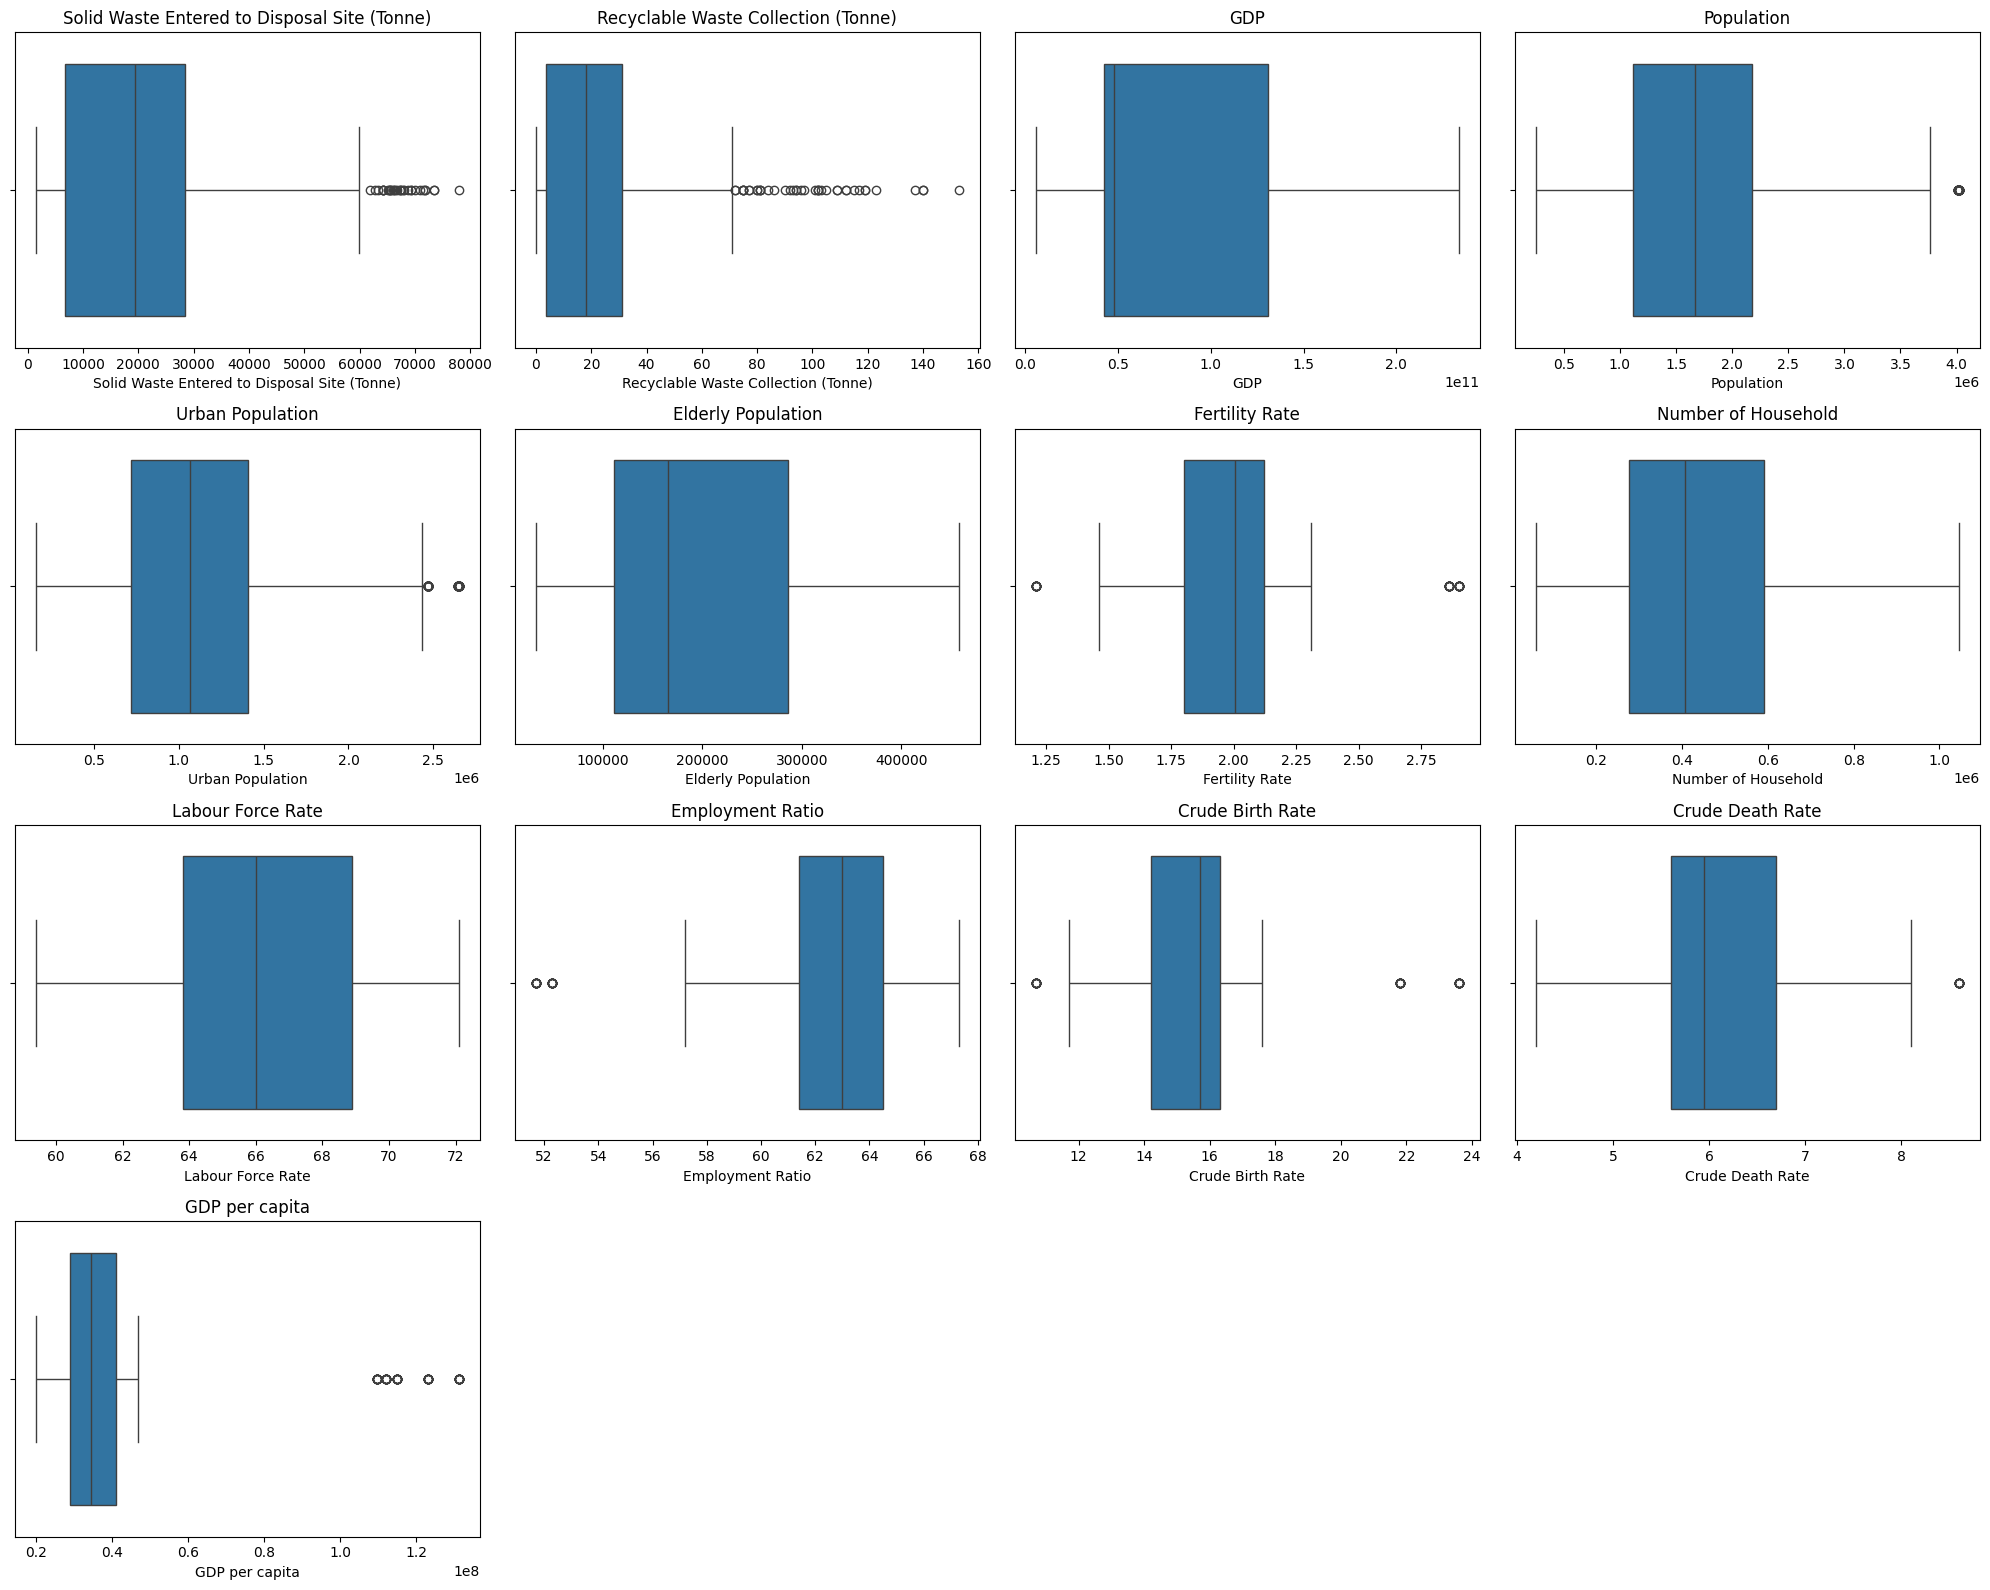

In [ ]:
# Dynamically calculate the grid size based on the number of numerical columns
num_cols = len(df.select_dtypes(include=np.number).columns)
n_rows = int(np.ceil(num_cols / 4))  # 4 columns per row

# Create the figure
plt.figure(figsize=(20, n_rows * 4))  # Adjust height based on rows

# Loop through numerical columns and plot
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(n_rows, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Since the outlier values are not excessively extreme and come from a reliable source, outliers may represent an exceptional cases.For example, high GDP outliers could indicate states with large industries. Also, high fertility rates or crude birth rates might reflect cultural or policy-driven trends. Hence, we will retain the data to ensure integrity and transparency.

The boxplot of the Solid Waste Entered to Disposal Site (Tonne) and Recycleable Waste Collection (Tonne) showed right-skewed distribution. Generally, median imputation is suitable for numerical data with a heavily skewed distribution and outliers (Firdose, 2023). On the other hand, missing values imputation with mean or median by group will show more refined result  (Huey, 2021). For example, missing values imputation within each state will ensure the overall trends remain consistent as each state has its own unique characteristics. Therefore, we will apply median imputation by state and month grouping for the ‘Solid Waste Entered to Disposal Site (Tonne)’ and ‘Recyclable Waste Collection (Tonne)’ columns. By grouping both state and month, it ensures the trends and characteristics of each state are consistent.

### Missing Values Treatment

In [ ]:
print(df.columns)

Index(['Year', 'Month', 'State', 'Facility',
       'Solid Waste Entered to Disposal Site (Tonne)',
       'Recyclable Waste Collection (Tonne)', 'GDP', 'Population',
       'Urban Population', 'Elderly Population', 'Fertility Rate',
       'Number of Household', 'Labour Force Rate', 'Employment Ratio',
       'Crude Birth Rate', 'Crude Death Rate', 'Date', 'GDP per capita'],
      dtype='object')


Grouping the Estimated Waste Per Year by state to calculate the median since the it is closely tied to state-specific characteristics such as population size, urbanization, and economic activity.

In [ ]:
# Ensure the relevant columns are numeric
df['Solid Waste Entered to Disposal Site (Tonne)'] = pd.to_numeric(
    df['Solid Waste Entered to Disposal Site (Tonne)'], errors='coerce'
)
df['Recyclable Waste Collection (Tonne)'] = pd.to_numeric(
    df['Recyclable Waste Collection (Tonne)'], errors='coerce'
)

# Grouped median imputation for "Solid Waste Entered to Disposal Site (Tonne)"
df['Solid Waste Entered to Disposal Site (Tonne)'] = df.groupby(['State', 'Month'])[
    'Solid Waste Entered to Disposal Site (Tonne)'
].transform(lambda x: x.fillna(x.median()))

# Grouped median imputation for "Recyclable Waste Collection (Tonne)"
df['Recyclable Waste Collection (Tonne)'] = df.groupby(['State', 'Month'])[
    'Recyclable Waste Collection (Tonne)'
].transform(lambda x: x.fillna(x.median()))

# Fallback to overall median for remaining NaN values in both columns
overall_median_solid = df['Solid Waste Entered to Disposal Site (Tonne)'].median()
df['Solid Waste Entered to Disposal Site (Tonne)'] = df['Solid Waste Entered to Disposal Site (Tonne)'].fillna(overall_median_solid)

overall_median_recyclable = df['Recyclable Waste Collection (Tonne)'].median()
df['Recyclable Waste Collection (Tonne)'] = df['Recyclable Waste Collection (Tonne)'].fillna(overall_median_recyclable)

# Verify if missing values are filled
missing_values_after_imputation = df[
    ['Solid Waste Entered to Disposal Site (Tonne)', 'Recyclable Waste Collection (Tonne)']
].isnull().sum()

print("Missing values after imputation:")
print(missing_values_after_imputation)


Missing values after imputation:
Solid Waste Entered to Disposal Site (Tonne)    0
Recyclable Waste Collection (Tonne)             0
dtype: int64


If the missing values still persist after grouping-based imputation, using the overall median as a fallback is a correct and practical approach.

In [ ]:
# Check the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          504 non-null    category      
 1   Month                                         504 non-null    category      
 2   State                                         504 non-null    category      
 3   Facility                                      504 non-null    category      
 4   Solid Waste Entered to Disposal Site (Tonne)  504 non-null    float64       
 5   Recyclable Waste Collection (Tonne)           504 non-null    float64       
 6   GDP                                           504 non-null    float64       
 7   Population                                    504 non-null    float64       
 8   Urban Population                              504 non-null    float64 

### Drop Irrelevant Column

There are six states (Johor, Kedah, Melaka, Negeri Sembilan, Pahang, Perlis) and two federal territories (Wilayah Persekutuan Kuala Lumpur, Putrajaya)  that operate under the Solid Waste and Public Cleansing Management Act 2007 (Act 672). Putrajaya is excluded from this dataset since there is no landfill in Putrajaya, and its solid waste disposed of in Tanjung 12, Selangor. Therefore, any state or territory not governed under Act 672 must be removed from the dataset.

In [ ]:
# Drop rows where 'State' is 'Terengganu'
df = df[df['State'] != 'Terengganu']

# If 'State' is a categorical type, remove unused categories
if df['State'].dtype.name == 'category':
    df['State'] = df['State'].cat.remove_unused_categories()

# Verify if 'Terengganu' is removed
print(df['State'].unique())

['Johor', 'Kedah', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perlis', 'W.P. Kuala Lumpur']
Categories (7, object): ['Johor', 'Kedah', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perlis',
                         'W.P. Kuala Lumpur']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 503
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          480 non-null    category      
 1   Month                                         480 non-null    category      
 2   State                                         480 non-null    category      
 3   Facility                                      480 non-null    category      
 4   Solid Waste Entered to Disposal Site (Tonne)  480 non-null    float64       
 5   Recyclable Waste Collection (Tonne)           480 non-null    float64       
 6   GDP                                           480 non-null    float64       
 7   Population                                    480 non-null    float64       
 8   Urban Population                              480 non-null    float64      

### Save Cleaned Dataset

In [ ]:


from google.colab import files
df.to_csv('cleaned_dataset.csv', encoding = 'utf-8-sig')
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3 EDA

In [ ]:
# Use the minimum date ordinal as the baseline
df['Date Ordinal'] = df['Date'].apply(lambda x: x.toordinal() - df['Date'].min().toordinal())


In [ ]:
print(df.columns)

Index(['Year', 'Month', 'State', 'Facility',
       'Solid Waste Entered to Disposal Site (Tonne)',
       'Recyclable Waste Collection (Tonne)', 'GDP', 'Population',
       'Urban Population', 'Elderly Population', 'Fertility Rate',
       'Number of Household', 'Labour Force Rate', 'Employment Ratio',
       'Crude Birth Rate', 'Crude Death Rate', 'Date', 'GDP per capita',
       'Date Ordinal'],
      dtype='object')


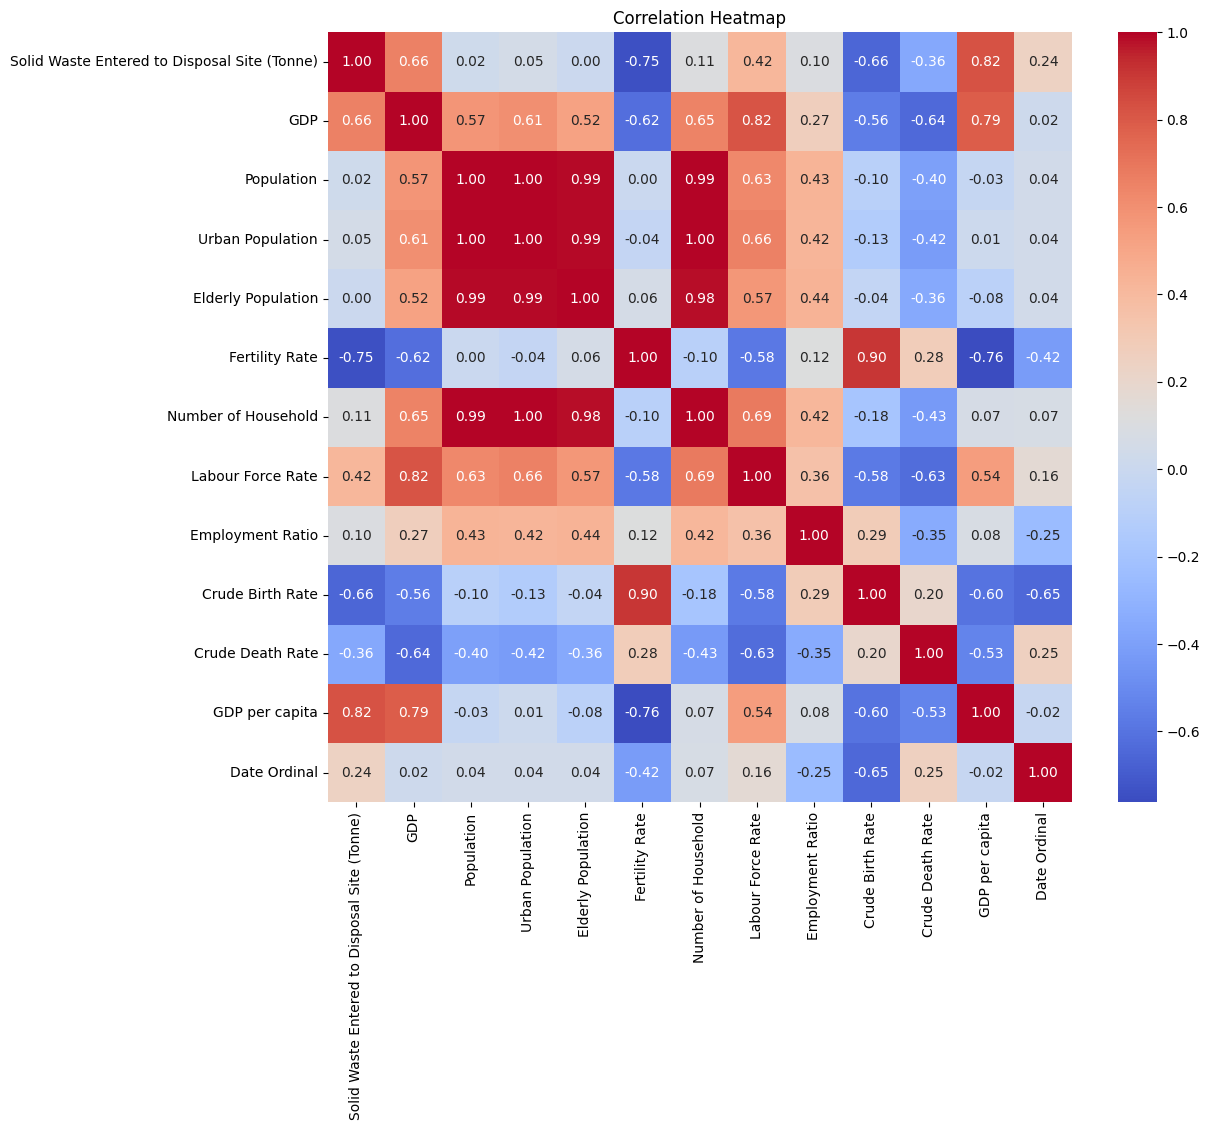

In [ ]:

# Exclude specific columns and select numerical columns
columns_to_exclude = ["Recyclable Waste Collection (Tonne)"]
numerical_cols = df.drop(columns=columns_to_exclude).select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



No Correlation with Target Variable ( > - 0.2 or < 0.2) = Need to Drop
* Population (0.02)
* Urban Population (0.05)
* Elderly Population (0)
* Number of Household (0.10)
* Employment Ratio (0.10)

Highly Correlated Features (Pearson Correlation > 0.8 or < -0.8):
* Population and Urban Population
* Population and Number of Household
* Elderly Population and Population
* Fertility Rate and Crude Birth Rate
* GDP and GDP per capita
* Labour Force Rate and GDP


GDP vs GDP per capita  
* GDP per capita (0.825) has a much stronger correlation than GDP (0.662).

Fertility Rate vs. Crude Birth Rate:
Fertility Rate (-0.747) has a stronger correlation than Crude Birth Rate (-0.657).

Conclusion to Drop: Urban Population, Population, Number of Household, Elderly Population, Employment Ratio, GDP, Crude Birth Rate



In [ ]:
print(df.columns)


Index(['Year', 'Month', 'State', 'Facility',
       'Solid Waste Entered to Disposal Site (Tonne)',
       'Recyclable Waste Collection (Tonne)', 'GDP', 'Population',
       'Urban Population', 'Elderly Population', 'Fertility Rate',
       'Number of Household', 'Labour Force Rate', 'Employment Ratio',
       'Crude Birth Rate', 'Crude Death Rate', 'Date', 'GDP per capita',
       'Date Ordinal'],
      dtype='object')


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Safely drop specified columns from the DataFrame
features_to_drop = [
    'Urban Population', 'Population', 'Number of Household',
    'Elderly Population', 'Employment Ratio', 'GDP', 'Facility',
    'Crude Birth Rate', 'Recyclable Waste Collection (Tonne)'
]
features_to_drop = [feature for feature in features_to_drop if feature in df.columns]  # Ensure features exist
data = df.drop(columns=features_to_drop)

# Recalculate VIF for the cleaned dataset
remaining_features = data.select_dtypes(include=['float64', 'int64']).columns.drop(
    ['Solid Waste Entered to Disposal Site (Tonne)'])  # Exclude the target variable
X_cleaned = sm.add_constant(data[remaining_features])

# Compute VIF for the remaining features
vif_cleaned = pd.DataFrame()
vif_cleaned["Feature"] = X_cleaned.columns
vif_cleaned["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

# Display the updated VIF values
vif_cleaned.sort_values(by="VIF", ascending=False)


,Feature,VIF
0,const,2791.088596
1,Fertility Rate,4.985508
4,GDP per capita,4.225419
2,Labour Force Rate,2.467513
3,Crude Death Rate,2.408299
5,Date Ordinal,1.970056


Thresholds for Concern:
* A VIF > 10 suggests severe multicollinearity and warrants immediate attention.
* A VIF between 5 and 10 indicates moderate multicollinearity, which may require further investigation.
* A VIF < 5 indicates low multicollinearity, which is generally acceptable.


All features are acceptable for inclusion in your predictive model.


In [ ]:
def create_custom_line_chart(data, x_col, y_col, color_col, title, category_orders=None):

    # Define default custom colors
    custom_colors = {
        'Johor': '#e41a1c',  # Red
        'Kedah': '#377eb8',  # Blue
        'Melaka': '#4daf4a',  # Green
        'Negeri Sembilan': '#984ea3',  # Purple
        'Pahang': '#ff69b4',  # Pink
        'Perlis': '#ff7f00',  # Orange
        'W.P. Kuala Lumpur': '#a65628'  # Brown
    }

    # Create the line chart
    fig = px.line(
        data,
        x=x_col,
        y=y_col,
        color=color_col,
        title=title,
        labels={x_col: 'Date', y_col: y_col, color_col: 'State'},
        color_discrete_map=custom_colors,  # Apply the custom colors
        category_orders=category_orders  # Order the categories if specified
    )

    # Customize the layout
    fig.update_traces(mode='lines')  # Remove markers
    fig.update_layout(
        title={
            'text': title,
            'y': 0.9,  # Adjust vertical alignment
            'x': 0.5,  # Center align
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title=x_col,
        yaxis_title=y_col,
        template='plotly_white',
        hovermode='x unified',  # Show only the point being hovered
        width=800,  # Set graph width
        height=400,  # Set graph height
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            linecolor='black',
            linewidth=1
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgrey',
            linecolor='black',
            linewidth=1
        ),
        legend=dict(
            bgcolor='rgba(255, 255, 255, 0.8)',  # Slightly transparent background
            bordercolor='grey',
            borderwidth=1
        )
    )

    return fig


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 503
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          480 non-null    category      
 1   Month                                         480 non-null    category      
 2   State                                         480 non-null    category      
 3   Solid Waste Entered to Disposal Site (Tonne)  480 non-null    float64       
 4   Fertility Rate                                480 non-null    float64       
 5   Labour Force Rate                             480 non-null    float64       
 6   Crude Death Rate                              480 non-null    float64       
 7   Date                                          480 non-null    datetime64[ns]
 8   GDP per capita                                480 non-null    float64      

**Perform One-Hot Encoding for columns containing categorical (string) values**

One-hot encoding is a technique used to transform categorical data into a format that can be provided to machine learning models. It works by converting each unique category in a column into a separate binary column (0 or 1).

Main reasons for selecting One-Hot Encoding:

1) No Assumption of Ordinality, avoids implying an order or magnitude between categories.

2) Each category is treated independently, preventing models from making incorrect assumptions about relationships between categories.



In [ ]:
# Perform one-hot encoding for "State"
data = pd.get_dummies(data, columns=['State'], prefix='State')

data.head()

,Year,Month,Solid Waste Entered to Disposal Site (Tonne),Fertility Rate,Labour Force Rate,Crude Death Rate,Date,GDP per capita,Date Ordinal,State_Johor,State_Kedah,State_Melaka,State_Negeri Sembilan,State_Pahang,State_Perlis,State_W.P. Kuala Lumpur
0,2017,January,18202.86,2.12,67.0,5.6,2017-01-01,3.342205e+07,0,True,False,False,False,False,False,False
1,2017,February,13684.92,2.12,67.0,5.6,2017-02-01,3.342205e+07,31,True,False,False,False,False,False,False
2,2017,March,14945.05,2.12,67.0,5.6,2017-03-01,3.342205e+07,59,True,False,False,False,False,False,False
3,2017,April,14015.15,2.12,67.0,5.6,2017-04-01,3.342205e+07,90,True,False,False,False,False,False,False
4,2017,May,14605.30,2.12,67.0,5.6,2017-05-01,3.342205e+07,120,True,False,False,False,False,False,False


In [ ]:
data.describe()

,Solid Waste Entered to Disposal Site (Tonne),Fertility Rate,Labour Force Rate,Crude Death Rate,Date,GDP per capita,Date Ordinal,Predicted Solid Waste (Tonne),Error (Tonne)
count,480.000000,480.000000,480.000000,480.000000,480,4.800000e+02,480.000000,480.000000,480.000000
mean,24648.772792,1.936000,66.522500,6.217500,2019-06-16 20:48:00,4.342769e+07,896.866667,24376.020979,4565.323553
min,1925.280000,1.210000,59.900000,4.200000,2017-01-01 00:00:00,2.008796e+07,0.000000,4507.179858,1.804871
25%,9661.395000,1.795000,64.325000,5.600000,2018-03-24 06:00:00,3.001016e+07,447.250000,12858.601220,1301.521500
50%,20278.455000,1.990000,66.300000,6.000000,2019-06-16 00:00:00,3.472305e+07,896.000000,21235.825850,2647.918551
75%,30398.423750,2.120000,68.900000,6.700000,2020-09-08 12:00:00,4.124317e+07,1346.500000,25350.748453,5858.936049
max,77915.860000,2.310000,72.100000,8.600000,2021-12-01 00:00:00,1.311606e+08,1795.000000,69727.651802,24739.770334
std,19491.200212,0.244507,2.896588,0.994235,NaN,2.939223e+07,527.713672,17465.843102,5066.904995


In [ ]:
print(data.columns)

Index(['Year', 'Month', 'Solid Waste Entered to Disposal Site (Tonne)',
       'Fertility Rate', 'Labour Force Rate', 'Crude Death Rate', 'Date',
       'GDP per capita', 'Date Ordinal', 'State_Johor', 'State_Kedah',
       'State_Melaka', 'State_Negeri Sembilan', 'State_Pahang', 'State_Perlis',
       'State_W.P. Kuala Lumpur'],
      dtype='object')


#### Univariate Analysis

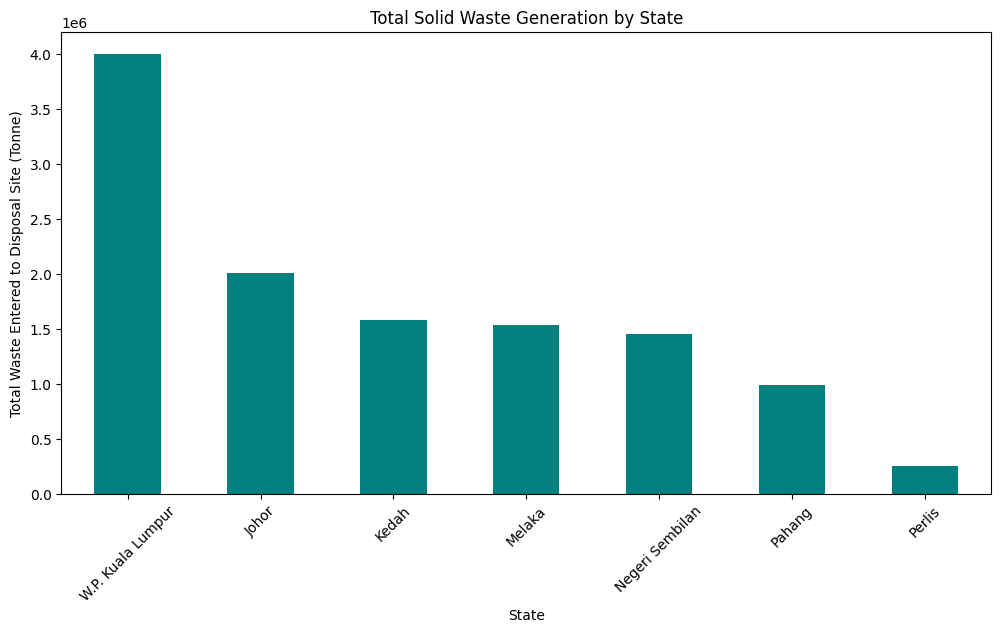

In [ ]:
# Sum of waste generation by state
state_waste = df.groupby('State')['Solid Waste Entered to Disposal Site (Tonne)'].sum().sort_values(ascending=False)

# Bar chart for waste generation by state
plt.figure(figsize=(12, 6))
state_waste.plot(kind='bar', color='teal')
plt.title("Total Solid Waste Generation by State")
plt.xlabel("State")
plt.ylabel("Total Waste Entered to Disposal Site (Tonne)")
plt.xticks(rotation=45)
plt.show()


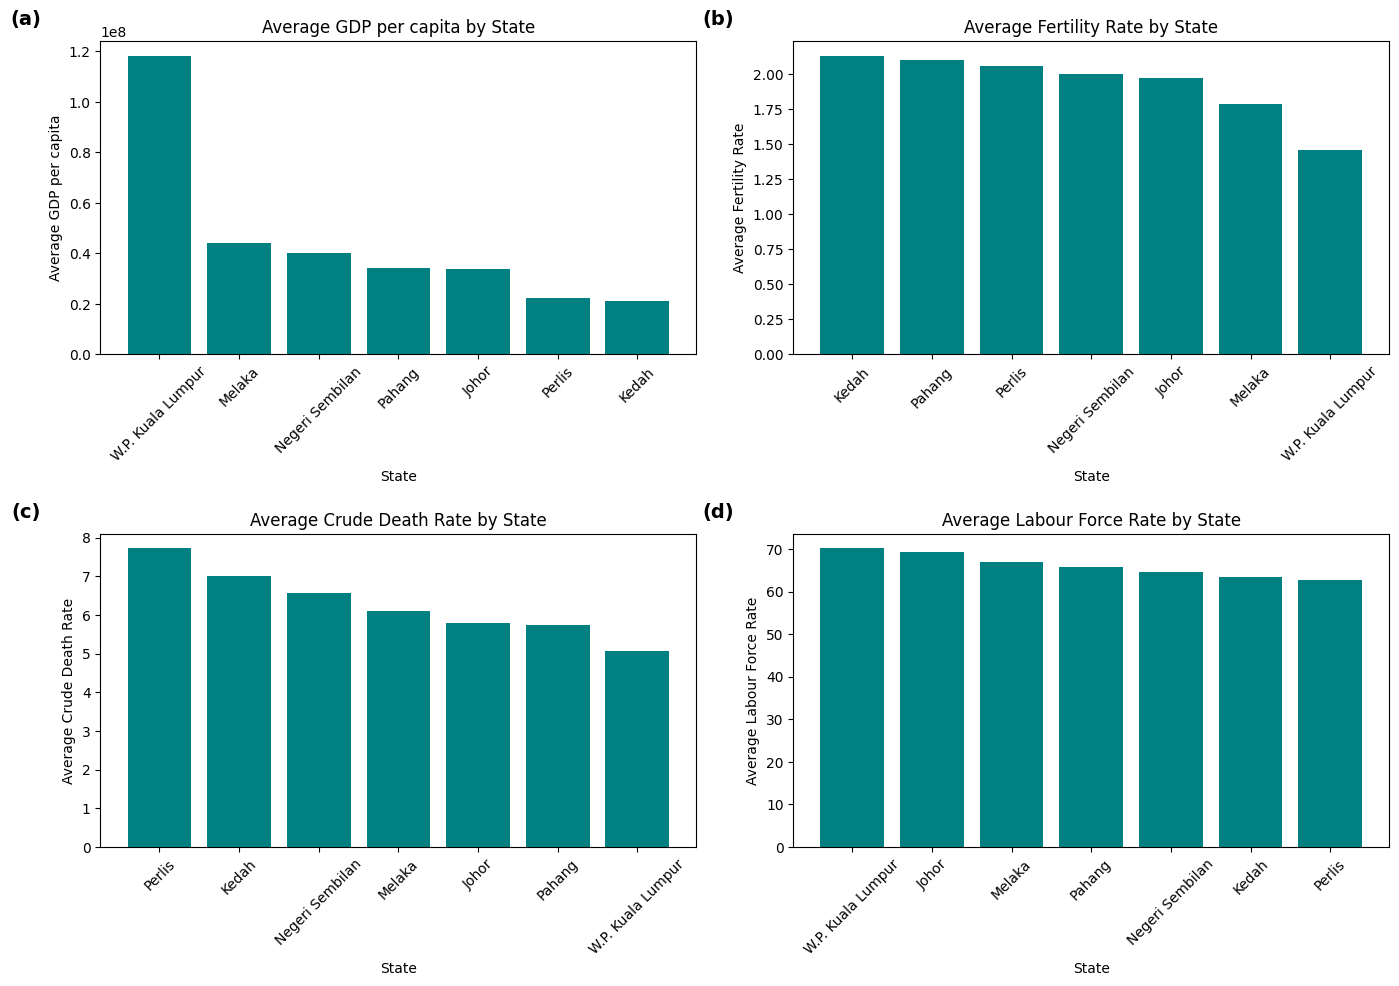

In [ ]:

# List of variables to plot
variables = ['GDP per capita', 'Fertility Rate', 'Crude Death Rate', 'Labour Force Rate']

# Labels for the subplots
labels = ['(a)', '(b)', '(c)', '(d)']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each variable and corresponding subplot
for i, variable in enumerate(variables):
    # Calculate the mean by state and sort values
    state_mean = df.groupby('State')[variable].mean().sort_values(ascending=False)

    # Plot the bar chart in the appropriate subplot
    axes[i].bar(state_mean.index, state_mean, color='teal', width=0.8)
    axes[i].set_title(f"Average {variable} by State")
    axes[i].set_xlabel("State")
    axes[i].set_ylabel(f"Average {variable}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Add subplot label (a), (b), etc.
    axes[i].text(-0.1, 1.1, labels[i], transform=axes[i].transAxes,
                 fontsize=14, fontweight='bold', va='top', ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Observations:
GDP per Capita:

W.P. Kuala Lumpur has the highest average GDP per capita, indicating higher economic activity compared to other states.
Significant disparity is evident between Kuala Lumpur and other regions.
Fertility Rate:

Kedah, Pahang, and Perlis have the highest average fertility rates, while W.P. Kuala Lumpur has the lowest, reflecting urbanization effects.
Crude Death Rate:

Perlis and Kedah have the highest crude death rates, while W.P. Kuala Lumpur has the lowest, indicating differences in demographic and healthcare conditions.
Labour Force Rate:

W.P. Kuala Lumpur and Johor have the highest labour force participation rates, while Perlis has the lowest.

In [ ]:

# Grouping the recyclable waste collection by state and summing values
recyclable_by_state = df.groupby('State')['Recyclable Waste Collection (Tonne)'].sum().reset_index()

# Sort the data in descending order for a clockwise pie chart
recyclable_by_state = recyclable_by_state.sort_values(by='Recyclable Waste Collection (Tonne)', ascending=False)

# Creating the pie chart directly
fig = px.pie(
    recyclable_by_state,
    values='Recyclable Waste Collection (Tonne)',
    names='State',
    title='Recyclable Waste Collection Distribution by State (Clockwise Descending)'
)

# Updating the percentage labels to show 1 decimal place
fig.update_traces(
    textinfo='percent+label',  # Shows percentages and labels
    texttemplate='%{percent:.1%}',  # Formatting percentages to 1 decimal place
    marker=dict(line=dict(color='#000000', width=0.5))  # Optional: Add outlines for clarity
)

# Centering the title
fig.update_layout(
    title={
        'text': 'Recyclable Waste Collection Distribution by State',
        'x': 0.5,  # Centers the title horizontally
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        title=None,
        orientation="v",  # Vertical legend
        itemclick="toggleothers"
    )
)

# Displaying the chart
fig.show()


#### Bivariate

Larger bubbles indicate states contributing more to overall waste.

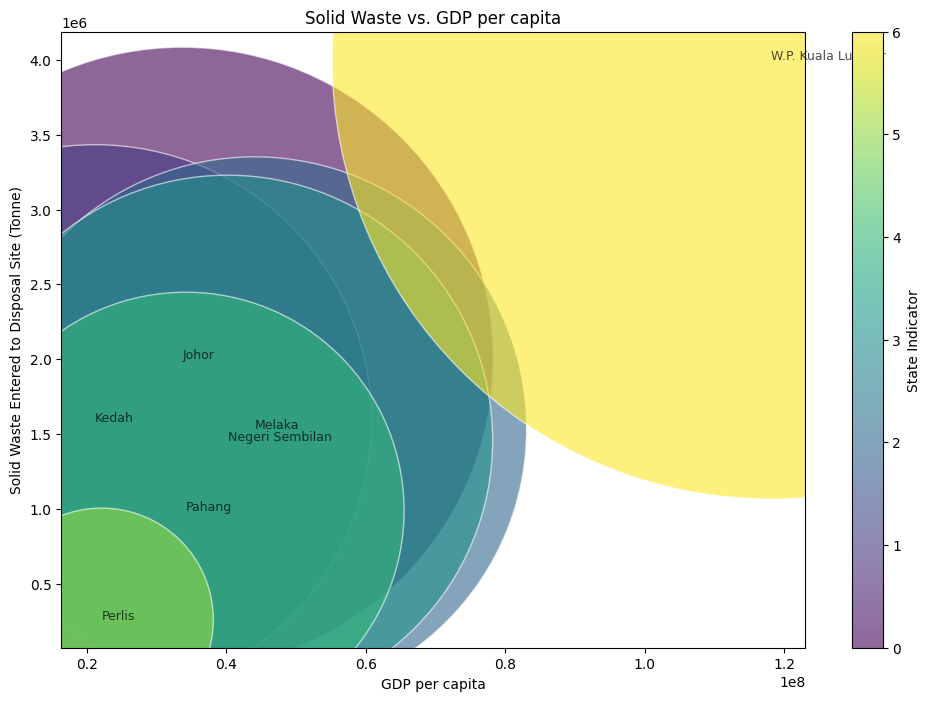

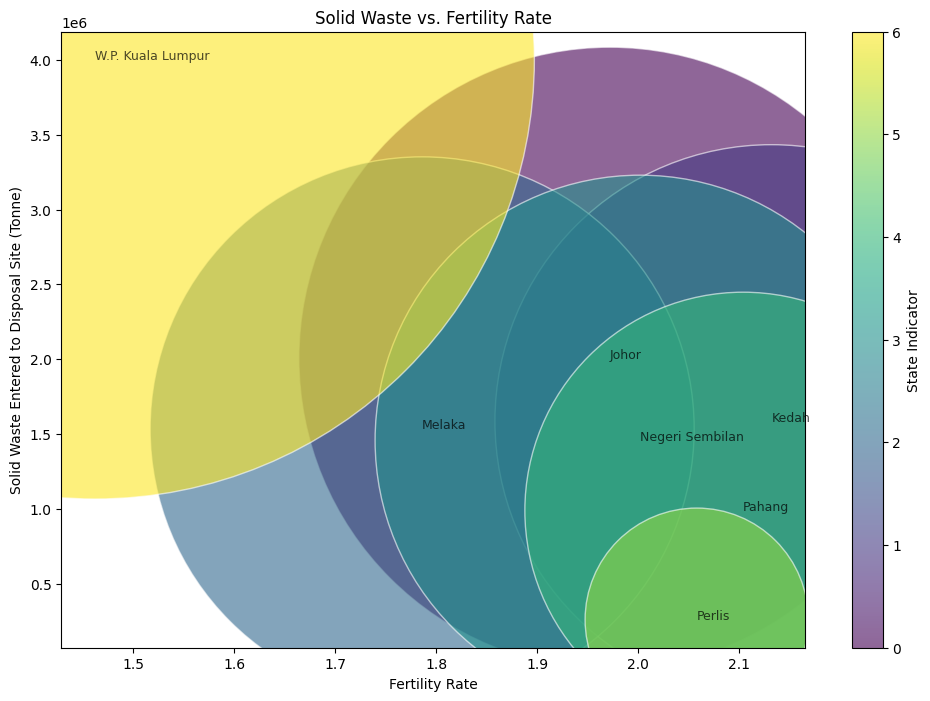

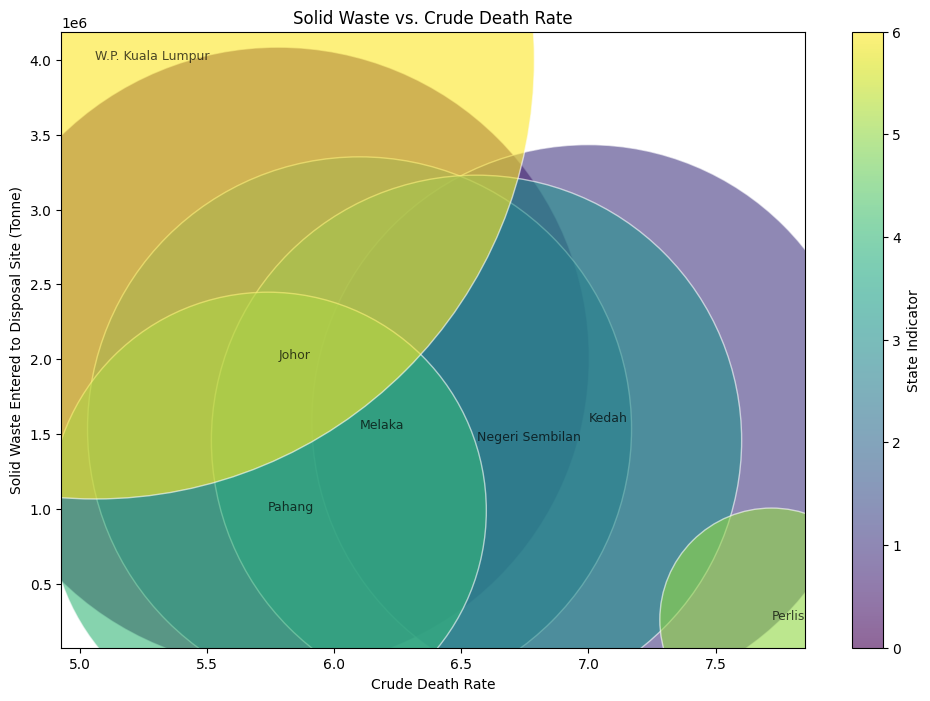

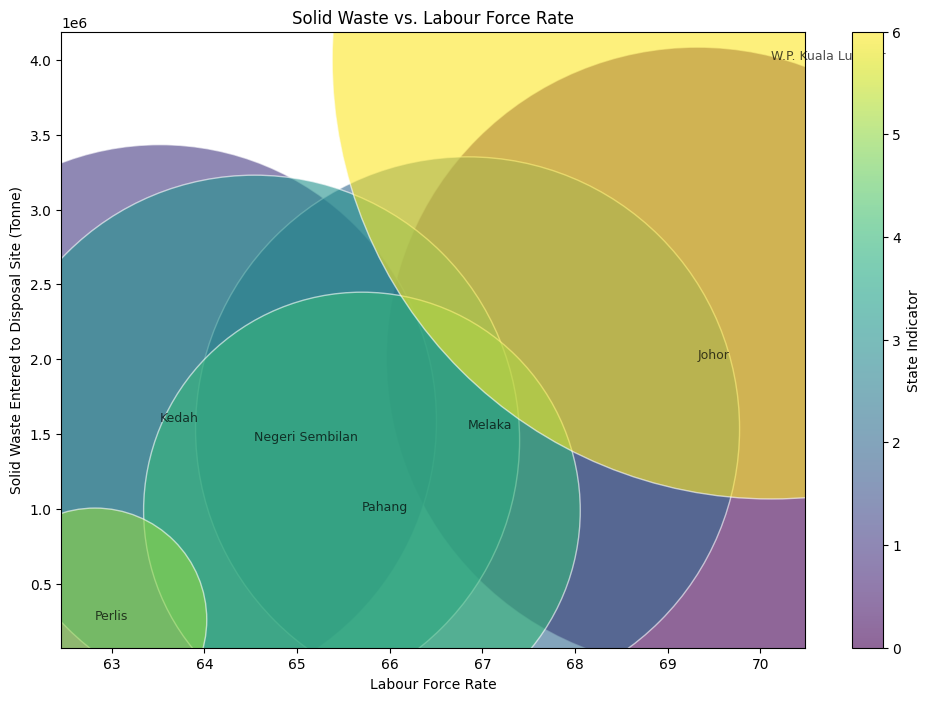

In [ ]:
# Bubble charts to visualize relationships, with bubble size representing total waste generation by state
import numpy as np

# Create bubble chart for each selected feature
for feature in ['GDP per capita', 'Fertility Rate', 'Crude Death Rate', 'Labour Force Rate']:
    plt.figure(figsize=(12, 8))
    state_data = df.groupby('State').agg({
        'Solid Waste Entered to Disposal Site (Tonne)': 'sum',
        feature: 'mean'
    }).reset_index()

    # Bubble chart
    plt.scatter(
        state_data[feature],
        state_data['Solid Waste Entered to Disposal Site (Tonne)'],
        s=state_data['Solid Waste Entered to Disposal Site (Tonne)'] / 10,  # Bubble size
        alpha=0.6,
        edgecolors="w",
        c=np.arange(len(state_data)),  # Unique color for each state
        cmap="viridis"
    )
    plt.title(f"Solid Waste vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Solid Waste Entered to Disposal Site (Tonne)")
    for i, state in enumerate(state_data['State']):
        plt.annotate(state, (state_data[feature].iloc[i], state_data['Solid Waste Entered to Disposal Site (Tonne)'].iloc[i]),
                     fontsize=9, alpha=0.7)
    plt.colorbar(label="State Indicator")
    plt.show()





#### Multivariate Analysis

In [ ]:
# Group data by State and Date
state_trend_data = df.groupby(['State', 'Date'])[
    ['Solid Waste Entered to Disposal Site (Tonne)', 'Recyclable Waste Collection (Tonne)']
].sum().reset_index()

# Calculate the total waste generation per state for sorting the legend
state_totals = state_trend_data.groupby('State')['Solid Waste Entered to Disposal Site (Tonne)'].sum()
sorted_states = state_totals.sort_values(ascending=False).index

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=state_trend_data,
    x_col='Date',
    y_col='Solid Waste Entered to Disposal Site (Tonne)',
    color_col='State',
    title='Solid Waste Generation by State Over Time',
    category_orders={'State': sorted_states}  # Order states by total waste generation
)

fig.update_layout(
    xaxis_title= 'Year',  # Remove x-axis title
    yaxis_title= 'Solid Waste Generation (Tonne)'
)

# Display the plot
fig.show()


In [ ]:
# Group data by Date and sum solid waste for all states combined
total_state_trend_data = df.groupby('Date')[
    'Solid Waste Entered to Disposal Site (Tonne)'
].sum().reset_index()

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=total_state_trend_data,
    x_col='Date',
    y_col='Solid Waste Entered to Disposal Site (Tonne)',
    color_col=None,  # No color grouping needed for total data
    title= 'Total Solid Waste Generation Over Time'
)

fig.update_layout(
    xaxis_title= 'Year',  # Remove x-axis title
    yaxis_title= 'Solid Waste Generation (Tonne)'
)
# Display the plot
fig.show()


In [ ]:
# Calculate the total recyclable waste collection per state for sorting the legend
state_totals = state_trend_data.groupby('State')['Recyclable Waste Collection (Tonne)'].sum()
sorted_states = state_totals.sort_values(ascending=False).index

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=state_trend_data,
    x_col='Date',
    y_col='Recyclable Waste Collection (Tonne)',
    color_col='State',
    title='Recyclable Waste Collection by State Over Time',
    category_orders={'State': sorted_states}  # Order states by total recyclable waste collection
)

fig.update_layout(
    xaxis_title= 'Year',  # Remove x-axis title
    yaxis_title= 'Recyclable Waste Collection (Tonne)'
)

# Display the plot
fig.show()


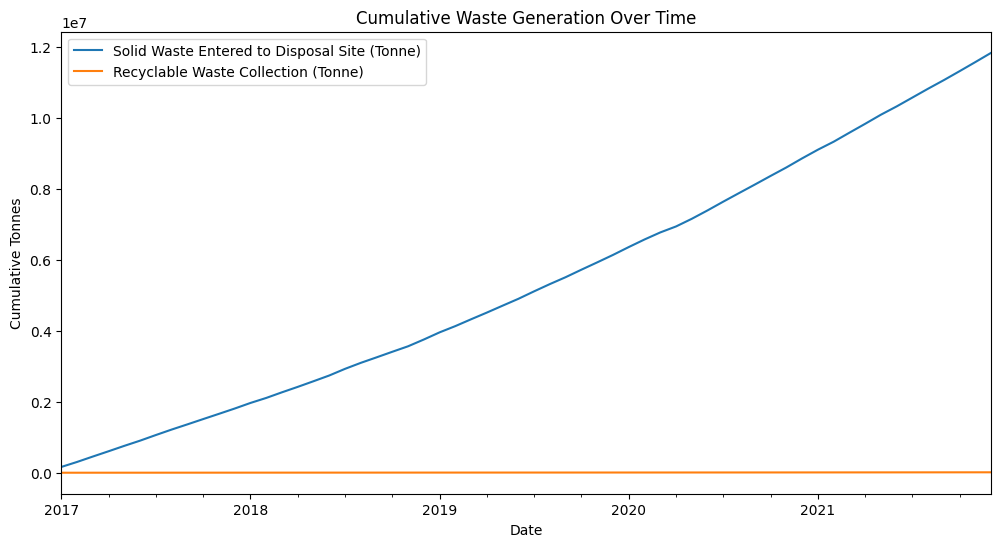

In [ ]:
cumulative_trend = state_trend_data.groupby('Date')[['Solid Waste Entered to Disposal Site (Tonne)', 'Recyclable Waste Collection (Tonne)']].sum().cumsum()
cumulative_trend.plot(figsize=(12, 6), title="Cumulative Waste Generation Over Time")
plt.ylabel("Cumulative Tonnes")
plt.show()


Key Observations:

* Solid Waste Entered to Disposal Site:

The blue line shows a steady and significant increase in cumulative waste generation over time.
This indicates a consistent upward trend in waste disposal at landfill sites or similar facilities, reflecting growing waste generation over the years.

* Recyclable Waste Collection:

The orange line is nearly flat, showing a minimal cumulative increase in recyclable waste collection.
This suggests that despite increasing waste generation, the amount of recyclable waste collected has not scaled proportionally.

* Comparison:

The gap between the two lines indicates that recyclable waste collection contributes only a very small fraction of the total waste generated.
This disparity highlights a potential inefficiency in recycling systems or a lack of recyclable materials in the waste stream.

Implications:
* Recycling Programs:

Recycling efforts appear underutilized or ineffective relative to the total waste being generated.
Policies or programs may need to focus on improving recycling rates to close the gap.
* Sustainability Concerns:

The sharp increase in total waste generation with minimal improvement in recycling suggests a growing environmental burden.
Without interventions, landfill usage and waste management challenges will likely escalate.
* Potential for Targeted Actions:

Emphasize increasing recyclable waste collection through awareness campaigns, better sorting facilities, or incentives for recycling.
Target regions or sectors with higher waste contributions for improved waste management practices.



## Data Modelling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 503
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          480 non-null    category      
 1   Month                                         480 non-null    category      
 2   Solid Waste Entered to Disposal Site (Tonne)  480 non-null    float64       
 3   Fertility Rate                                480 non-null    float64       
 4   Labour Force Rate                             480 non-null    float64       
 5   Crude Death Rate                              480 non-null    float64       
 6   Date                                          480 non-null    datetime64[ns]
 7   GDP per capita                                480 non-null    float64       
 8   Date Ordinal                                  480 non-null    int64        

Before spliting, data was shuffled to avoid bias: If the data is ordered, models trained on unshuffled data may learn patterns that don't generalize well to unseen data. Ensuring Randomness in Splits: When splitting data into training and testing sets, shuffling ensures that both sets represent the overall data distribution.

In [ ]:
# Shuffle the dataset to ensure randomness
data = data.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:
X = data.drop(columns=['Solid Waste Entered to Disposal Site (Tonne)','Date', 'Year','Month'])
y = data['Solid Waste Entered to Disposal Site (Tonne)']


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fertility Rate           480 non-null    float64
 1   Labour Force Rate        480 non-null    float64
 2   Crude Death Rate         480 non-null    float64
 3   GDP per capita           480 non-null    float64
 4   Date Ordinal             480 non-null    int64  
 5   State_Johor              480 non-null    bool   
 6   State_Kedah              480 non-null    bool   
 7   State_Melaka             480 non-null    bool   
 8   State_Negeri Sembilan    480 non-null    bool   
 9   State_Pahang             480 non-null    bool   
 10  State_Perlis             480 non-null    bool   
 11  State_W.P. Kuala Lumpur  480 non-null    bool   
dtypes: bool(7), float64(4), int64(1)
memory usage: 22.2 KB


In [ ]:
# Import the required library for splitting
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Display

print("Training Set Size", X_train.shape)
print("Testing Set Size", X_test.shape)


Training Set Size (384, 12)
Testing Set Size (96, 12)


Training Set: 384 samples (80% of the total) used to train the model.


Testing Set: 96 samples (20% of the total) reserved to test and validate the model's performance.


12 Features: Independent variables used as predictors in the model.


### Training and Evaluation



In [ ]:

# Machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



Define model to use - Random Forest, Linear Regression, and ANN




In [ ]:
# Define Linear Regression model
lr_model = LinearRegression()

# Define Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define ANN model
ann_model = Sequential([
    # Input layer and first hidden layer
    Dense(units=64, kernel_initializer='normal', input_dim=12, activation='relu'),
    # Second hidden layer
    Dense(units=32, kernel_initializer='normal', activation='relu'),
    # Output layer
    Dense(1)
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Combine models in a dictionary for later use if needed
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "ANN": ann_model
}

**Define metrics to use**

As this is a regression model, MAE, MSE, RMSE, and R² were used to evaluate its performance. These metrics provide insights into the model's accuracy, error magnitude, and ability to explain the variability in the target variable.

i) MAE (Mean Absolute Error): The average of all the absolute differences between predicted and actual values.
  
ii) MSE (Mean Squared Error): The average of the squared differences between predicted and actual values, giving more weight to larger errors.

iii) RMSE (Root Mean Squared Error): The square root of MSE, showing the average error in the same units as the target.

iv) R² (R-Squared): The percentage of the target variable's variation that the model explains, with higher values showing a better fit.

In [ ]:
# Dictionary to store predictions and results
predictions = {}
results = {}

for model_name, model in models.items():
    # Train the model
    if model_name == "ANN":
        model.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)
    else:
        model.fit(X_train, y_train)

    # Predict using the unscaled test data
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

# Convert results to a DataFrame for a tabular summary
results_df = pd.DataFrame(results).T  # Transpose to make models the index

# Display the summary table
print(results_df)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                            MAE           MSE          RMSE        R²
Linear Regression   6240.220723  6.975242e+07   8351.791348  0.821720
Random Forest       6225.691790  1.167267e+08  10804.012537  0.701658
ANN                10265.137985  1.547444e+08  12439.631665  0.604488


**Key Findings**

**Best Performance in waste generation prediction:**

Linear Regression performs the best with the lowest MSE, RMSE and highest R², followed by Random Forest Regression, and then ANN

ANN has the lowest R2 value showed that hyperparameter tuning is important

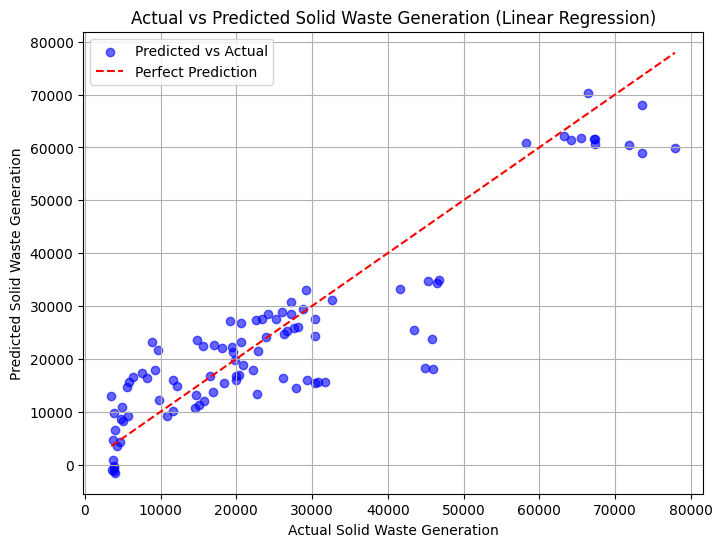

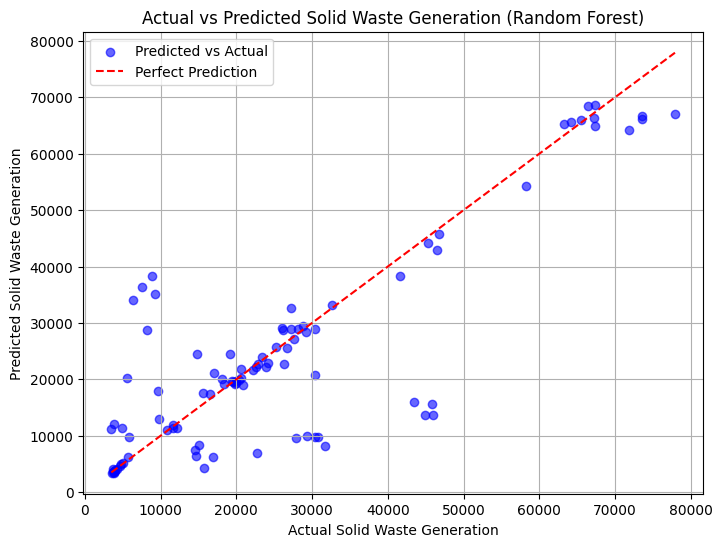

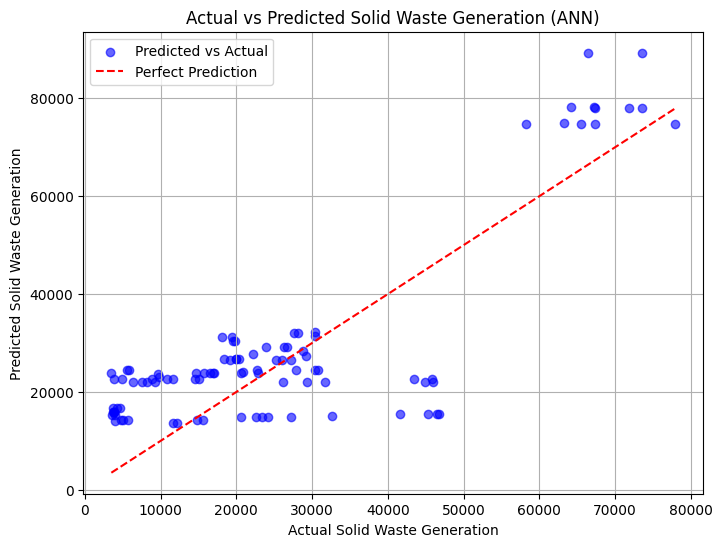

In [ ]:
# Iterate through each model and plot Actual vs Predicted
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

    plt.title(f'Actual vs Predicted Solid Waste Generation ({model_name})')
    plt.xlabel('Actual Solid Waste Generation')
    plt.ylabel('Predicted Solid Waste Generation')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Linear Regression
lr_model = LinearRegression()
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Display results
print("Linear Regression Cross-Validation R² Scores:", lr_cv_scores)
print("Mean CV R² (Linear Regression):", lr_cv_scores.mean())

print("Random Forest Cross-Validation R² Scores:", rf_cv_scores)
print("Mean CV R² (Random Forest):", rf_cv_scores.mean())


Linear Regression Cross-Validation R² Scores: [0.8737669  0.85832343 0.84374543 0.78326968 0.83996926]
Mean CV R² (Linear Regression): 0.8398149371714265
Random Forest Cross-Validation R² Scores: [0.8307019  0.76543805 0.8323285  0.69390874 0.78873195]
Mean CV R² (Random Forest): 0.7822218260656075


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [ 32, 64, 128],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],     # Maximum depth of trees
    'max_features': ['auto', 'sqrt', 'log2'],  # Features to consider for the best split
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required in a leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE for optimization
    n_jobs=-1,  # Use all available cores
    verbose=2  # Display progress
)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters and best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {r2}")
print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")






Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 128}
Best Model: RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=5,
                      n_estimators=128, random_state=42)
Test R²: 0.8547869048886942
Test MAE: 5239.971908708952
Test RMSE: 7537.557943325111


## Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to evaluate the model on different subsets
rf_cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')  # Using R² as evaluation metric

# R² scores
rf_cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", rf_cv_r2_scores)
print("Mean CV R²:", rf_cv_r2_scores.mean())

# RMSE scores
rf_cv_mse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse_scores = np.sqrt(-rf_cv_mse_scores)
print("Cross-Validation RMSE Scores:", rf_cv_rmse_scores)
print("Mean CV RMSE:", rf_cv_rmse_scores.mean())

Cross-Validation R² Scores: [0.88550082 0.85904508 0.86770556 0.79972589 0.83791681]
Mean CV R²: 0.8499788317835677
Cross-Validation RMSE Scores: [7227.0472093  7187.16605944 6457.81574099 8888.83467434 7013.78354646]
Mean CV RMSE: 7354.929446106093


All R² scores are relatively high, with an average of 0.85, indicating the model captures 85% of the variance in the target across the folds. Although there is one fold with R2 0.7997, it is still acceptable snce it explains around 80%

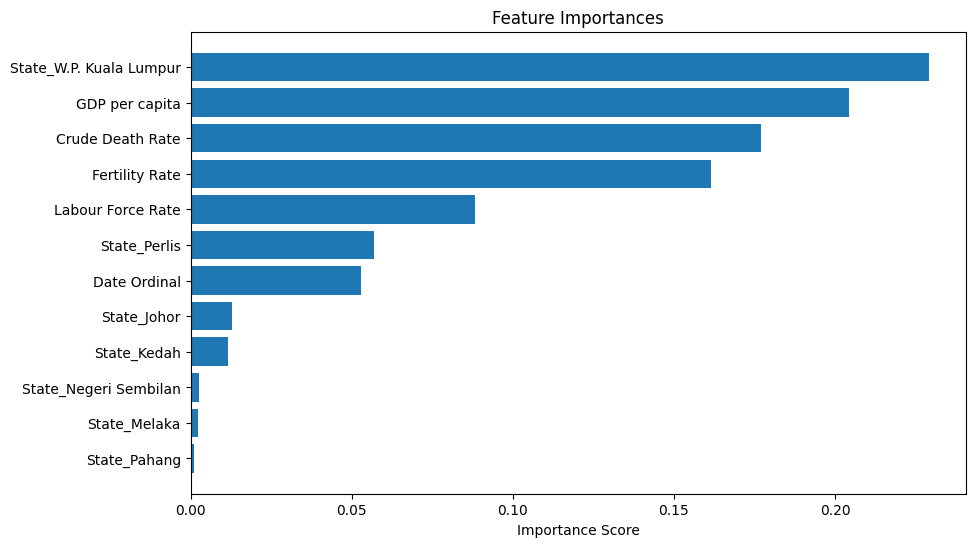

In [ ]:
# Extract feature importances from the best model
importances = best_model.feature_importances_
feature_names = X_train.columns

# Sort feature importances for plotting
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, align='center')
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.show()

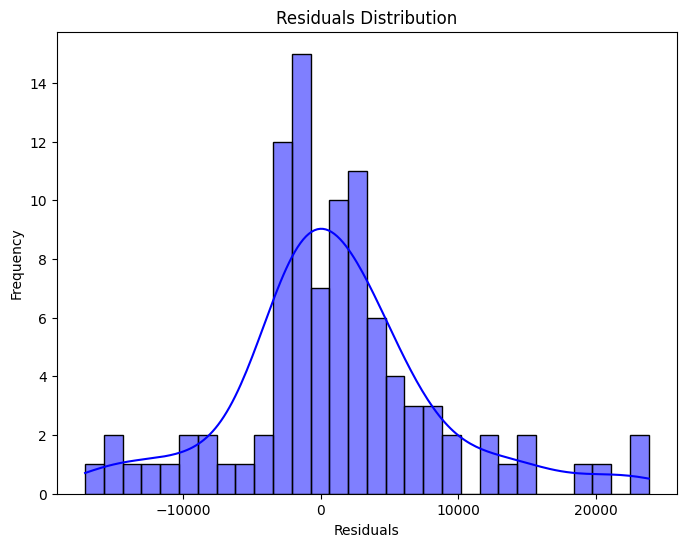

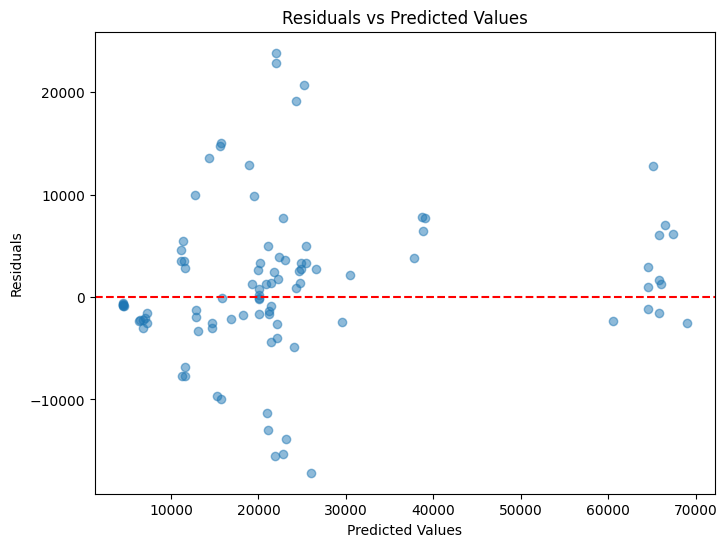

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

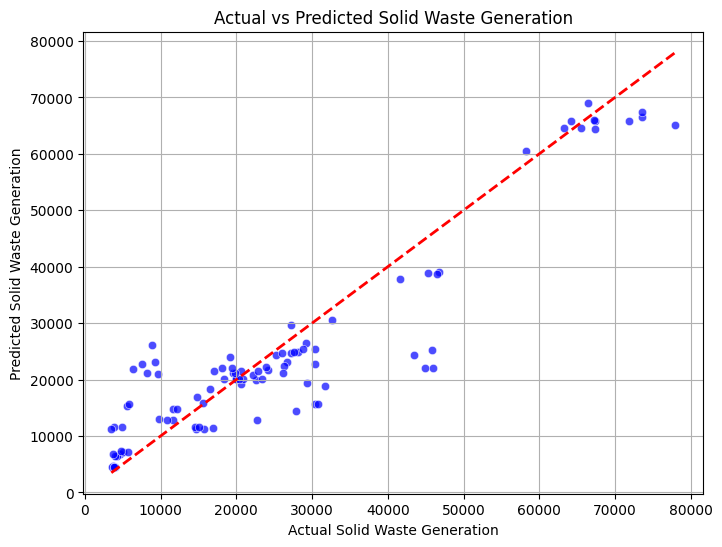

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)  # Diagonal line
plt.title("Actual vs Predicted Solid Waste Generation")
plt.xlabel("Actual Solid Waste Generation")
plt.ylabel("Predicted Solid Waste Generation")
plt.grid(True)
plt.show()

Descriptive Analysis:
* Overall Trend:

There is a clear positive correlation between the actual and predicted values, meaning that as the actual solid waste generation increases, the predicted values also tend to increase. This indicates that the model is capturing the general trend of solid waste generation.
Closer to the Perfect Prediction Line:

Some data points are very close to or even fall on the red dashed "perfect prediction" line. These points represent instances where the model's predictions are very accurate and closely match the actual values.
Dispersion of Points:

There is some dispersion around the perfect prediction line, especially for the higher values of solid waste generation (e.g., values above 60,000 tonnes). This suggests that the model's predictions become less accurate as the actual values increase.
Outliers:

A few data points, particularly those in the higher range of waste generation (above 70,000 tonnes), appear to be outliers, as they are far from the red dashed line. These points represent predictions that are significantly different from the actual values.
The model might not be accurately predicting these extreme values, indicating that it may need further adjustments or that external factors are influencing these extreme predictions.
Model Performance:

Overall, the model seems to perform reasonably well, with the majority of predictions being close to the actual values. However, there is room for improvement, particularly for higher values of solid waste generation.
The closer the points are to the red line, the better the model's performance.

* Suggestions for Improvement:


Outlier Handling: Investigate the outliers to determine whether they are true values or anomalies in the data. Adjusting for these outliers, either by using more robust models or by excluding them, might improve the predictions.

Model Complexity: The model may benefit from further complexity (e.g., deeper trees in Random Forest, additional features, or tuning) to improve predictions for higher values.


Feature Engineering: Including additional or more relevant features (such as temporal factors or external economic factors) could help the model make more accurate predictions for extreme cases.

In [ ]:
#To check if model overfit or underfit

# Predict on training data
y_train_pred = best_model.predict(X_train)

# Calculate training metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on test data
y_test_pred = best_model.predict(X_test)

# Calculate test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the results
print(f"Training R²: {train_r2}, RMSE: {train_rmse}")
print(f"Test R²: {test_r2}, RMSE: {test_rmse}")


Training R²: 0.883276537536857, RMSE: 6623.7511006240475
Test R²: 0.8547869048886942, RMSE: 7537.557943325111


The model performs well on both the training and test sets, explaining 88.3% and 85.5% of the variance, respectively. The gap between the two R² values is small, indicating the model generalizes well and is not overfitting.

The test RMSE is slightly higher than the training RMSE, which is expected. However, the difference is not large, suggesting the model is not overfitting.

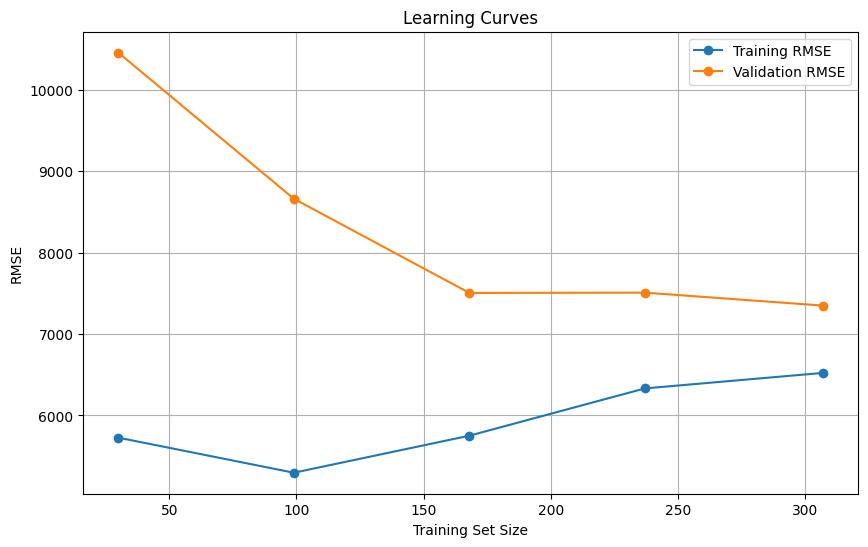

In [ ]:
from sklearn.model_selection import learning_curve
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert scores to RMSE
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse.mean(axis=1), label="Training RMSE", marker='o')
plt.plot(train_sizes, test_rmse.mean(axis=1), label="Validation RMSE", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ensure the test set indices align with the original dataset
data.loc[X_test.index, 'Predicted Solid Waste (Tonne)'] = y_pred

# Display the first few rows to verify
print(data.head())

   Year     Month  Solid Waste Entered to Disposal Site (Tonne)  \
0  2020  February                                      29386.49   
1  2021      July                                       5119.03   
2  2019  November                                       3341.01   
3  2020  February                                      23210.25   
4  2020     April                                       4098.88   

   Fertility Rate  Labour Force Rate  Crude Death Rate       Date  \
0            1.94               70.4               5.2 2020-02-01   
1            1.92               63.8               7.8 2021-07-01   
2            1.98               64.7               7.9 2019-11-01   
3            1.96               64.1               5.9 2020-02-01   
4            1.96               63.0               6.8 2020-04-01   

   GDP per capita  Date Ordinal  State_Johor  State_Kedah  State_Melaka  \
0    3.194093e+07          1126         True        False         False   
1    2.039864e+07          1642 

In [ ]:
# Save the updated dataset to a CSV file
data.to_csv('predicted_waste_dataset.csv', index=False)

# If you're using Google Colab or Jupyter and want to download it
from google.colab import files
files.download('predicted_waste_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediction

In [ ]:
# Predict on the entire dataset
y_pred_all = best_model.predict(X)

# Add predictions and errors to the original DataFrame
data['Predicted Solid Waste (Tonne)'] = y_pred_all
data['Error (Tonne)'] = abs(data['Solid Waste Entered to Disposal Site (Tonne)'] - data['Predicted Solid Waste (Tonne)'])

# Save the updated dataset to a CSV file
data.to_csv('predicted_waste_dataset_all.csv', index=False)

In [ ]:
files.download('predicted_waste_dataset_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          480 non-null    category      
 1   Month                                         480 non-null    category      
 2   Solid Waste Entered to Disposal Site (Tonne)  480 non-null    float64       
 3   Fertility Rate                                480 non-null    float64       
 4   Labour Force Rate                             480 non-null    float64       
 5   Crude Death Rate                              480 non-null    float64       
 6   Date                                          480 non-null    datetime64[ns]
 7   GDP per capita                                480 non-null    float64       
 8   Date Ordinal                                  480 non-null    int64   

In [ ]:
# Aggregate the data by date, summing actual and predicted values across all states
aggregated_data = data.groupby(data['Date']).agg({
    'Solid Waste Entered to Disposal Site (Tonne)': 'sum',
    'Predicted Solid Waste (Tonne)': 'sum'
}).reset_index()

# Melt the data for Plotly (long-form format)
melted_aggregated_data = aggregated_data.melt(
    id_vars=['Date'],
    value_vars=['Solid Waste Entered to Disposal Site (Tonne)', 'Predicted Solid Waste (Tonne)'],
    var_name='Type',
    value_name='Solid Waste (Tonne)'
)

# Map the custom labels for the legend
melted_aggregated_data['Type'] = melted_aggregated_data['Type'].replace({
    'Solid Waste Entered to Disposal Site (Tonne)': 'Actual',
    'Predicted Solid Waste (Tonne)': 'Predicted'
})

# Define a specific custom color map for "Actual" and "Predicted"
custom_colors = {
    'Actual': '#377eb8',  # Blue
    'Predicted': '#ff7f00'  # Orange
}

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=melted_aggregated_data,
    x_col='Date',
    y_col='Solid Waste (Tonne)',
    color_col='Type',
    title='Actual vs Predicted Solid Waste Generation Over Time'

)

# Apply custom colors
fig.update_traces(
    line=dict(color=custom_colors['Actual'], dash=None),  # Solid blue line for Actual
    selector=dict(name='Actual')
)

fig.update_traces(
    line=dict(color=custom_colors['Predicted'], dash='dot'),  # Dotted orange line for Predicted
    selector=dict(name='Predicted')
)

fig.update_layout(
    xaxis_title='Year',
    legend_title_text= None
)

# Show the plot
fig.show()


### Future Prediction

In [ ]:
# Identify trends for each variable
variables = ['Labour Force Rate', 'Crude Death Rate', 'Fertility Rate', 'GDP per capita']
trends = {}

# Calculate variance and identify trends (monthly and yearly)
for var in variables:
    yearly_variance = data.groupby('Year')[var].var()
    monthly_variance = data.groupby(['Year', 'Month'])[var].var()

    trends[var] = {
        'Yearly Variance': yearly_variance.mean(),
        'Monthly Variance': monthly_variance.mean()
    }

# Convert trends to a DataFrame for better visualization
trends_df = pd.DataFrame(trends).T.reset_index().rename(columns={'index': 'Variable'})

print(trends_df)


            Variable  Yearly Variance  Monthly Variance
0  Labour Force Rate     8.066179e+00      9.122464e+00
1   Crude Death Rate     7.014632e-01      7.933214e-01
2     Fertility Rate     4.876989e-02      5.515643e-02
3     GDP per capita     8.673084e+14      9.808845e+14


1. Labour Force Rate

  Analysis: The monthly variance is close to the yearly variance, indicating minimal significant monthly fluctuation beyond the yearly trend.

  Approach: Use state-specific yearly averages or a moving average to smooth out month-to-month noise while retaining yearly trends.

2. Crude Death Rate

  Analysis: The death rate is relatively stable over time, with slightly more monthly variation.

  Approach: Use linear trend projection at the state level, as this variable shows gradual changes over time.

3. Fertility Rate:

  Analysis: Fertility rates change gradually, so monthly fluctuations are not substantial.
  
  Approach: Use linear interpolation between yearly values for each state.

4. GDP per Capita:

  Analysis: The high variance suggests significant variation over time.
  
  Approach: Use state-level yearly averages combined with linear interpolation to capture economic trends.



In [ ]:
# the prediction range to 2022–2027
start_year = 2022
end_year = 2027

# Generate future dates for the adjusted range
future_dates = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31', freq='M')



In [ ]:
# Initialize the future_data DataFrame
future_data = pd.DataFrame({
    'Date': future_dates,
    'Year': future_dates.year.astype('category'),
    'Month': future_dates.month.astype('category'),
    'Date Ordinal': future_dates.map(pd.Timestamp.toordinal)
})




In [ ]:
# Add one-hot encoded state columns with False as default
states = [col for col in data.columns if col.startswith('State_')]
for state in states:
    future_data[state] = False

In [ ]:
# Populate other features based on historical averages or trends
state_features = ['Fertility Rate', 'Labour Force Rate', 'Crude Death Rate', 'GDP per capita']

# Calculate state-specific yearly averages for these features
state_trends = data.groupby(['Year'] + states)[state_features].mean().reset_index()

# Initialize an empty DataFrame to store results for all states
future_state_predictions = pd.DataFrame()

# Loop through each state to create state-specific future data
for state in states:
    # Copy the base future_data for this state
    state_future_data = future_data.copy()

    # Set the current state to True and others to False
    for s in states:
        state_future_data[s] = (s == state)

    # Populate trends for the current state
    for feature in state_features:
        historical_state_data = state_trends[state_trends[state] == True]
        trend = historical_state_data[['Year', feature]].dropna()
        if len(trend) > 1:  # Ensure enough data points for fitting
            z = np.polyfit(trend['Year'], trend[feature], 1)  # Fit a linear trend
            p = np.poly1d(z)  # Create polynomial object
            state_future_data[feature] = p(state_future_data['Year'].astype(int))
        else:
            # If insufficient data, fill with historical mean
            state_future_data[feature] = historical_state_data[feature].mean()

    # Append state-specific data to the combined DataFrame
    future_state_predictions = pd.concat([future_state_predictions, state_future_data], ignore_index=True)



In [ ]:
print(future_state_predictions.columns)



Index(['Date', 'Year', 'Month', 'Date Ordinal', 'State_Johor', 'State_Kedah',
       'State_Melaka', 'State_Negeri Sembilan', 'State_Pahang', 'State_Perlis',
       'State_W.P. Kuala Lumpur', 'Fertility Rate', 'Labour Force Rate',
       'Crude Death Rate', 'GDP per capita'],
      dtype='object')


In [ ]:
# View the DataFrame information
future_state_predictions.info()

# View the first few rows of the DataFrame
future_state_predictions.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     504 non-null    datetime64[ns]
 1   Year                     504 non-null    category      
 2   Month                    504 non-null    category      
 3   Date Ordinal             504 non-null    int64         
 4   State_Johor              504 non-null    bool          
 5   State_Kedah              504 non-null    bool          
 6   State_Melaka             504 non-null    bool          
 7   State_Negeri Sembilan    504 non-null    bool          
 8   State_Pahang             504 non-null    bool          
 9   State_Perlis             504 non-null    bool          
 10  State_W.P. Kuala Lumpur  504 non-null    bool          
 11  Fertility Rate           504 non-null    float64       
 12  Labour Force Rate        504 non-nul

,Date,Year,Month,Date Ordinal,State_Johor,State_Kedah,State_Melaka,State_Negeri Sembilan,State_Pahang,State_Perlis,State_W.P. Kuala Lumpur,Fertility Rate,Labour Force Rate,Crude Death Rate,GDP per capita
0,2022-01-31,2022,1,738186,True,False,False,False,False,False,False,1.651,71.57,6.32,3.237420e+07
1,2022-02-28,2022,2,738214,True,False,False,False,False,False,False,1.651,71.57,6.32,3.237420e+07
2,2022-03-31,2022,3,738245,True,False,False,False,False,False,False,1.651,71.57,6.32,3.237420e+07
3,2022-04-30,2022,4,738275,True,False,False,False,False,False,False,1.651,71.57,6.32,3.237420e+07
4,2022-05-31,2022,5,738306,True,False,False,False,False,False,False,1.651,71.57,6.32,3.237420e+07


In [ ]:

# List the columns in the training dataset
print("Training features:")
print(X_train.columns)


Training features:
Index(['Fertility Rate', 'Labour Force Rate', 'Crude Death Rate',
       'GDP per capita', 'Date Ordinal', 'State_Johor', 'State_Kedah',
       'State_Melaka', 'State_Negeri Sembilan', 'State_Pahang', 'State_Perlis',
       'State_W.P. Kuala Lumpur'],
      dtype='object')


In [ ]:
# List the columns in the future data
print("Future data features:")
print(future_state_predictions.columns)


Future data features:
Index(['Date', 'Year', 'Month', 'Date Ordinal', 'State_Johor', 'State_Kedah',
       'State_Melaka', 'State_Negeri Sembilan', 'State_Pahang', 'State_Perlis',
       'State_W.P. Kuala Lumpur', 'Fertility Rate', 'Labour Force Rate',
       'Crude Death Rate', 'GDP per capita'],
      dtype='object')


In [ ]:
# Keep only the features used during training
future_features = future_state_predictions[X_train.columns]

# Verify alignment
print("Aligned future data features:")
print(future_features.columns)

Aligned future data features:
Index(['Fertility Rate', 'Labour Force Rate', 'Crude Death Rate',
       'GDP per capita', 'Date Ordinal', 'State_Johor', 'State_Kedah',
       'State_Melaka', 'State_Negeri Sembilan', 'State_Pahang', 'State_Perlis',
       'State_W.P. Kuala Lumpur'],
      dtype='object')


In [ ]:
# Predict future solid waste using the best model
y_future_pred = best_model.predict(future_features)

# Add predictions to the future_state_predictions DataFrame
future_state_predictions['Predicted Solid Waste (Tonne)'] = y_future_pred


In [ ]:
# Prepare data for the custom line chart
future_state_predictions['State'] = future_state_predictions[states].idxmax(axis=1)  # Map each row to its state

# Remove the "State_" prefix for better readability in the legend
future_state_predictions['State'] = future_state_predictions['State'].str.replace('State_', '')

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=future_state_predictions,
    x_col='Date',
    y_col='Predicted Solid Waste (Tonne)',
    color_col='State',
    title='Predicted Solid Waste by State'
)

fig.update_layout(
    xaxis_title='Year' # Change x-axis title to "Year"
)

# Display the plot
fig.show()



In [ ]:
# Concatenate original and future data
combined_data = pd.concat([data, future_state_predictions], ignore_index=True)

# Save the combined data
combined_data.to_csv('combined_data_with_predictions.csv', index=False)
print("Combined data saved to 'combined_data_with_predictions.csv'")
files.download('combined_data_with_predictions.csv')

Combined data saved to 'combined_data_with_predictions.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Year                                          984 non-null    int64         
 1   Month                                         984 non-null    object        
 2   Solid Waste Entered to Disposal Site (Tonne)  480 non-null    float64       
 3   Fertility Rate                                984 non-null    float64       
 4   Labour Force Rate                             984 non-null    float64       
 5   Crude Death Rate                              984 non-null    float64       
 6   Date                                          984 non-null    datetime64[ns]
 7   GDP per capita                                984 non-null    float64       
 8   Date Ordinal                                  984 non-null    int64   

In [ ]:
# Aggregate the actual and predicted data by summing or averaging across states for each date
aggregated_actual = combined_data.groupby('Date', as_index=False)['Solid Waste Entered to Disposal Site (Tonne)'].sum()
aggregated_predicted = combined_data.groupby('Date', as_index=False)['Predicted Solid Waste (Tonne)'].sum()

# Merge the aggregated data into a single DataFrame for plotting
aggregated_data = pd.merge(aggregated_actual, aggregated_predicted, on='Date', how='outer')

# Filter actual values (blue line) up to December 2021
filtered_actual_data = aggregated_data[aggregated_data['Date'] <= '2021-12-31']

# Keep the predicted values (red line) as is
filtered_predicted_data = aggregated_data

# Melt the actual and predicted data
plot_actual = pd.melt(
    filtered_actual_data,
    id_vars=['Date'],
    value_vars=['Solid Waste Entered to Disposal Site (Tonne)'],
    var_name='Data Type',
    value_name='Solid Waste (Tonne)'
)

plot_predicted = pd.melt(
    filtered_predicted_data,
    id_vars=['Date'],
    value_vars=['Predicted Solid Waste (Tonne)'],
    var_name='Data Type',
    value_name='Solid Waste (Tonne)'
)

# Combine the filtered actual and full predicted data for plotting
plot_data = pd.concat([plot_actual, plot_predicted], ignore_index=True)

# Map the custom labels for the legend
plot_data['Data Type'] = plot_data['Data Type'].replace({
    'Solid Waste Entered to Disposal Site (Tonne)': 'Actual',
    'Predicted Solid Waste (Tonne)': 'Predicted'
})

# Define custom colors
custom_colors = {
    'Actual': '#377eb8',  # Blue
    'Predicted': '#ff7f00'  # Orange
}

# Use the custom line chart function
fig = create_custom_line_chart(
    data=plot_data,
    x_col='Date',
    y_col='Solid Waste (Tonne)',
    color_col='Data Type',
    title='Actual vs Predicted Solid Waste Generation Over Time'
)

fig.update_layout(
    xaxis_title='Year', # Change x-axis title to "Year"
    legend_title_text=None
)

# Apply specific styles for Actual and Predicted lines
fig.update_traces(
    line=dict(color=custom_colors['Actual'], dash=None),  # Solid blue line for Actual
    selector=dict(name='Actual')
)

fig.update_traces(
    line=dict(color=custom_colors['Predicted'], dash='dot'),  # Dotted orange line for Predicted
    selector=dict(name='Predicted')
)

# Show the plot
fig.show()


The graph compares the actual solid waste generation (blue line) and the predicted solid waste generation (red line) over time. The actual data fluctuates because it is recorded on a monthly basis, reflecting real-world seasonal and operational variations. The predicted values are based on yearly aggregated features (e.g., GDP per capita, fertility rate, labor force rate), which remain constant throughout each year, leading to a smoother trend.

Since the available features (e.g., GDP, fertility rate) are annual values, it is assumed that these values remain unchanged across months within the same year. This assumption simplifies the prediction process but does not capture the finer granularity of monthly variations.

While the model captures long-term trends, it fails to reflect short-term variations due to the lack of high-resolution features. This could impact the accuracy of predictions for specific months or seasons. The assumption that yearly features (e.g., GDP, fertility rate) are constant across months is a simplification. In reality, these factors may have intra-year variations that are not captured in the predictions. Incorporating monthly or seasonal feature data (if available) could significantly improve the model’s ability to predict monthly solid waste generation and align better with actual data.

In [ ]:
# Aggregate the data by year to calculate the mean for actual and predicted solid waste
yearly_data = combined_data.groupby('Year', as_index=False).agg({
    'Solid Waste Entered to Disposal Site (Tonne)': 'mean',
    'Predicted Solid Waste (Tonne)': 'mean'
})

# Rename columns for clarity
yearly_data.rename(columns={
    'Solid Waste Entered to Disposal Site (Tonne)': 'Mean Actual Solid Waste (Tonne)',
    'Predicted Solid Waste (Tonne)': 'Mean Predicted Solid Waste (Tonne)'
}, inplace=True)

# Melt the data for plotting
plot_data = pd.melt(
    yearly_data,
    id_vars=['Year'],
    value_vars=['Mean Actual Solid Waste (Tonne)', 'Mean Predicted Solid Waste (Tonne)'],
    var_name='Data Type',
    value_name='Solid Waste (Tonne)'
)

# Map the custom labels for the legend
plot_data['Data Type'] = plot_data['Data Type'].replace({
    'Mean Actual Solid Waste (Tonne)': 'Actual',
    'Mean Predicted Solid Waste (Tonne)': 'Predicted'
})

# Define custom colors for Actual and Predicted
custom_colors = {
    'Actual': '#377eb8',  # Blue
    'Predicted': '#ff7f00'  # Orange
}

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=plot_data,
    x_col='Year',
    y_col='Solid Waste (Tonne)',
    color_col='Data Type',
    title='Yearly Mean Actual vs Predicted Solid Waste Generation'
)

# Apply custom colors
fig.update_traces(
    line=dict(color=custom_colors['Actual'], dash=None),  # Solid blue line for Actual
    selector=dict(name='Actual')
)

fig.update_traces(
    line=dict(color=custom_colors['Predicted'], dash='dot'),  # Dotted orange line for Predicted
    selector=dict(name='Predicted')
)

fig.update_layout(
    legend_title_text=None # Change this text to match the desired title
)

# Show the plot
fig.show()


In [ ]:
# Define state columns (columns that start with 'State_')
states = [col for col in combined_data.columns if col.startswith('State_')]

# Create a DataFrame to store the yearly mean for each state
state_mean_data = []

for state in states:
    # Filter rows where the state is True
    state_data = combined_data[combined_data[state] == True]

    # Group by year and calculate the mean predicted solid waste
    state_yearly_mean = state_data.groupby('Year')['Predicted Solid Waste (Tonne)'].mean().reset_index()
    state_yearly_mean['State'] = state.replace('State_', '')  # Add only the state name without prefix
    state_mean_data.append(state_yearly_mean)

# Combine all state data
state_mean_data = pd.concat(state_mean_data, ignore_index=True)

# Rename columns for clarity
state_mean_data.rename(columns={'Predicted Solid Waste (Tonne)': 'Mean Predicted Solid Waste (Tonne)'}, inplace=True)

# Use the custom line chart function to create the plot
fig = create_custom_line_chart(
    data=state_mean_data,
    x_col='Year',
    y_col='Mean Predicted Solid Waste (Tonne)',
    color_col='State',
    title='Yearly Mean Predicted Solid Waste by State'
)

# Apply custom colors
fig.for_each_trace(
    lambda trace: trace.update(line=dict(color=custom_colors[trace.name])) if trace.name in custom_colors else None
)

# Show the plot
fig.show()


W.P. Kuala Lumpur consistently shows the highest predicted solid waste generation. This aligns with its status as the capital and economic hub of Malaysia, with the highest GDP per capita and increased consumption and waste generation. Johor and Selangor exhibit steady growth in waste production, likely driven by economic growth, industrialization, and urbanization. Higher income levels often correlate with increased consumption and waste production.
Economic hubs have greater industrial activities, which contribute to higher solid waste generation.

In [ ]:
# Display the data for all states sorted by Year and State
state_mean_data_sorted = state_mean_data.sort_values(by=['Year', 'State']).reset_index(drop=True)
state_mean_data_sorted

,Year,Mean Predicted Solid Waste (Tonne),State
0,2017,11599.391996,Johor
1,2017,14693.536112,Kedah
2,2017,21226.322013,Melaka
3,2017,20103.937660,Negeri Sembilan
4,2017,12858.601220,Pahang
...,...,...,...
72,2027,32617.219326,Melaka
73,2027,32818.595788,Negeri Sembilan
74,2027,23347.008962,Pahang
75,2027,20846.162112,Perlis


In [ ]:


# Group by 'Year' and 'State' (where 'State' is derived from the one-hot encoded columns), and then calculate the mean of 'Solid Waste Entered to Disposal Site (Tonne)'
state_yearly_mean = combined_data.groupby(['Year'] + [col for col in combined_data.columns if col.startswith('State_')], observed=False)['Solid Waste Entered to Disposal Site (Tonne)'].mean().reset_index()

# Convert one-hot encoded state columns to a single 'State' column
state_yearly_mean['State'] = state_yearly_mean[[col for col in state_yearly_mean.columns if col.startswith('State_')]].idxmax(axis=1).str.replace('State_', '')
state_yearly_mean = state_yearly_mean.drop([col for col in state_yearly_mean.columns if col.startswith('State_')], axis=1)


# Display the resulting DataFrame
state_yearly_mean

,Year,Solid Waste Entered to Disposal Site (Tonne),State
0,2017,67205.031667,W.P. Kuala Lumpur
1,2017,3652.867500,Perlis
2,2017,10319.815000,Pahang
3,2017,19347.630000,Negeri Sembilan
4,2017,19513.612500,Melaka
...,...,...,...
72,2027,NaN,Pahang
73,2027,NaN,Negeri Sembilan
74,2027,NaN,Melaka
75,2027,NaN,Kedah


## Model Deployment

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'best_rf_model.pkl')

['best_rf_model.pkl']